# Projet 7 : Implémentez un modèle de scoring


Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.
 
 

L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

Les données
Voici les données dont vous aurez besoin pour réaliser le dashboard. Pour plus de simplicité, vous pouvez les télécharger à cette adresse.

Vous aurez sûrement besoin de joindre les différentes tables entre elles.

Votre mission : 
- Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
- Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.
- Mettre en production le modèle de scoring de prédiction à l’aide d’une API, ainsi que le dashboard interactif qui appelle l’API pour les prédictions.


Michaël, votre manager, vous incite à sélectionner un ou des kernels Kaggle pour vous faciliter l’analyse exploratoire, la préparation des données et le feature engineering nécessaires à l’élaboration du modèle de scoring. Si vous le faites, vous devez analyser ce ou ces kernels et le ou les adapterpour vous assurer qu’ils répond(ent) aux besoins de votre mission.

# Sommaire

## I. Importation
### 1. Importation des bibliothèques
### 2. Importation des fichiers


## II. Analyse exploration
### 1. Analyse des fichiers train et test
### 2. Analyse de la variable TARGET
### 3. Analyse des variables catégorielles
### 4. Analyse des variables numériques
#### 4.1 Analyse des variables 'AMT'
#### 4.2 Analyse des variables 'DAYS'
#### 4.3 Analyse des variables 'EXT'



## III. Feature Engineering
### 1. Création des nouvelles variables
### 2. Regroupement et création des nouveaux fichiers
### 3. Imputation des données
### 4. Sauvegarde des fichiers


## IV. Conclusion sur étape EDA - Feature Engineering

# 

# I. Importation

### 1. Importation des bibliothèques

In [1]:
# Bibliothèques standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno


import warnings
warnings.filterwarnings('ignore')

# Feature Engineering
import re
from collections import Counter

# Preprocessing et standardisation
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Séparation du jeu de données
from sklearn.model_selection import train_test_split

# Métriques et analyse des résultats
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, make_scorer


# Métriques et analyse des résultats
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve


# Modélisation : Régression Logistique
from sklearn.linear_model import LogisticRegression
# Modélisation : XGBoost
from sklearn.ensemble import GradientBoostingClassifier
# Modélisation LGBM
from lightgbm import LGBMClassifier
# Modélisation DummyClassifier
from sklearn.dummy import DummyClassifier


pd.set_option('display.max_columns', 300)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_colwidth', 200)

import os

# 

### 2. Importation des fichiers

In [2]:
#Liste des fichiers

PATH="data/"
print("LISTE DES FICHIERS :")
display(os.listdir(PATH))

LISTE DES FICHIERS :


['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'homecredit_columns_description.csv',
 'installments_payments.csv',
 'pos_cash_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [3]:
#Chargement des données
test  = pd.read_csv(PATH+"/application_test.csv")
train = pd.read_csv(PATH+"/application_train.csv")
bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
homecredit_columns_description = pd.read_csv(PATH+"/homecredit_columns_description.csv", encoding = 'unicode_escape', engine ='python')
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
POS_CASH_balance = pd.read_csv(PATH+"/pos_cash_balance.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
sample_submission = pd.read_csv(PATH+"/sample_submission.csv")

In [4]:
# Pour chaque nom de fichier dans la liste, lire le fichier avec pandas
train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(train.shape)

(307511, 122)


In [6]:
# Pour chaque nom de fichier dans la liste, lire le fichier avec pandas
test.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [7]:
print(test.shape)

(48744, 121)


In [8]:
# Pour chaque nom de fichier dans la liste, lire le fichier avec pandas
bureau.head(2)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN


In [9]:
print(bureau.shape)

(1716428, 17)


In [10]:
# Pour chaque nom de fichier dans la liste, lire le fichier avec pandas
bureau_balance.head(2)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C


In [11]:
print(bureau_balance.shape)

(27299925, 3)


In [12]:
# Pour chaque nom de fichier dans la liste, lire le fichier avec pandas
credit_card_balance.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.00,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.08,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0


In [13]:
print(credit_card_balance.shape)

(3840312, 23)


In [14]:
# Pour chaque nom de fichier dans la liste, lire le fichier avec pandas
installments_payments.head(2)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525


In [15]:
print(installments_payments.shape)

(13605401, 8)


In [16]:
# Pour chaque nom de fichier dans la liste, lire le fichier avec pandas
POS_CASH_balance.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0


In [17]:
print(POS_CASH_balance.shape)

(10001358, 8)


Description des fichiers

Fichier	Description
application_train.csv
application_test.csv

Il s'agit du tableau principal, divisé en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
Données statiques pour toutes les applications.
Une ligne représente un prêt dans notre échantillon de données.
bureau.csv

Tous les crédits précédents du client fournis par d'autres institutions financières qui ont été rapportés au Credit Bureau (pour les clients qui ont un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.
bureau_balance.csv

Soldes mensuels des crédits précédents dans Credit Bureau.
Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent rapporté au Credit Bureau - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) des lignes.
POS_CASH_balance.csv

Instantanés des soldes mensuels des prêts POS (point of sales) et cash précédents que le demandeur a eu avec Home Credit.
Ce tableau comporte une ligne pour chaque mois de l'historique de chaque crédit précédent au Home Credit (crédit à la consommation et prêts au comptant) lié aux prêts de notre échantillon - c'est-à-dire que le tableau comporte (# de prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lesquels nous avons un historique observable pour les crédits précédents) lignes.
credit_card_balance.csv

Instantanés des soldes mensuels des cartes de crédit précédentes que le demandeur possède chez Home Credit.
Ce tableau comporte une ligne pour chaque mois de l'historique de chaque crédit précédent dans le Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau comporte (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.
previous_application.csv

Toutes les demandes précédentes de prêts pour le crédit immobilier des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande antérieure liée aux prêts dans notre échantillon de données.
installments_payments.csv

Historique des remboursements pour les crédits précédemment déboursés dans Home Credit liés aux prêts de notre échantillon.
Il y a a) une ligne pour chaque paiement qui a été effectué plus b) une ligne pour chaque paiement manqué. Une ligne équivaut à un paiement d'un versement OU à un versement correspondant à un paiement d'un crédit précédent de Home Credit lié aux prêts de notre échantillon.
HomeCredit_columns_description.csv

Ce fichier contient les descriptions des colonnes des différents fichiers de données.

In [18]:
# Fonction pour clé primaire

def find_primary_key(dataframe):
    """
    Cette fonction trouve la clé primaire d'un DataFrame en vérifiant si une colonne unique existe.
    Si une colonne unique est trouvée, elle est renvoyée comme clé primaire. Sinon, None est renvoyé.
    """
    for column in dataframe.columns:
        if dataframe[column].is_unique:
            return column
    return None

find_primary_key(train)

'SK_ID_CURR'

Nous pouvons constater une différence concernant notre nombre de colonnes, nous allons étudier cette différence de colonne.

In [19]:
# Récupérer les noms des colonnes dans chaque dataframe
train_cols = train.columns
test_cols = test.columns

common_cols = train_cols.intersection(test_cols)
# Trouver la colonne manquante
train_not_test = test_cols.difference(train_cols)
train_not_test

Index([], dtype='object')

In [20]:
#Trouver les colonnes communes
#test[train.columns]
common_cols

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

Notre colonne manquante dans le fichier test est TARGET. Cela signifie que le jeu de données test sera utilisée pour la phase de prédiction dans la finalisation de notre projet.
Toutefois, les traitements que nous allons effectuer à notre jeu de données train sera également effectuée pour le test.

## II. Analyse exploratoire du train et test

Afin d'effectuer cette analyse, nous allons procéder à la méthodologie suivante :
1. Statistiques descriptives : Les statistiques descriptives fournissent des mesures numériques qui résuments la distribution des données, comme la moyenne, l'écart-type, la médiane, le minimum, le maximum, etc.

2. Analyse des valeurs manquantes. L'objectif sera de connaître la présence de valeurs manquantes et d'en obtenir le taux par colonnes. Ceci nous permettra d'établir une première stratégie pour un traitement optimal.

3. Visualisation des données : La visualisation des données permet de représenter graphiquement les données afin de détecter les tendances, les motifs et les anomalies.

### 1. Statistiques descriptives

In [21]:
# Analyse du fichier train

train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,NaN,NaN,NaN,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,307511.0,NaN,NaN,NaN,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,NaN,NaN,NaN,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,NaN,NaN,NaN,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,NaN,NaN,NaN,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5


In [22]:
# Analyse du fichier test

test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,48744.0,NaN,NaN,NaN,277796.67635,103169.547296,100001.0,188557.75,277549.0,367555.5,456250.0
NAME_CONTRACT_TYPE,48744,2,Cash loans,48305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,48744,2,F,32678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,48744,2,N,32311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,48744,2,Y,33658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,48744.0,NaN,NaN,NaN,0.397054,0.709047,0.0,0.0,0.0,1.0,20.0
AMT_INCOME_TOTAL,48744.0,NaN,NaN,NaN,178431.805855,101522.591536,26941.5,112500.0,157500.0,225000.0,4410000.0
AMT_CREDIT,48744.0,NaN,NaN,NaN,516740.435561,365397.004174,45000.0,260640.0,450000.0,675000.0,2245500.0
AMT_ANNUITY,48720.0,NaN,NaN,NaN,29426.240209,16016.368315,2295.0,17973.0,26199.0,37390.5,180576.0
AMT_GOODS_PRICE,48744.0,NaN,NaN,NaN,462618.840473,336710.21504,45000.0,225000.0,396000.0,630000.0,2245500.0


Sur notre première analyse des différents jeux de données, nous pouvons effectuer plusieurs hypothèses :

- Nous avons la présence de nombreuses valeurs manquantes dans nos différents jeux de données. Toutefois, notre clé primaire ne présente aucune valeur manquante et ne semble pas présenter de doublons (ce sera une étape à contrôler) mais également notre TARGET pour le jeu train.

- Quelques valeurs semblent très fortement en décalage entre la moyenne et le max, ces données devrons être surveillées et analyser s'il s'agit de valeurs aberrantes-atypiques ou si cela ne présente pas de décalage spécifique.


A présent, nous allons procéder à l'analyse des valeurs manquantes.

### 2. Analyse des valeurs manquantes

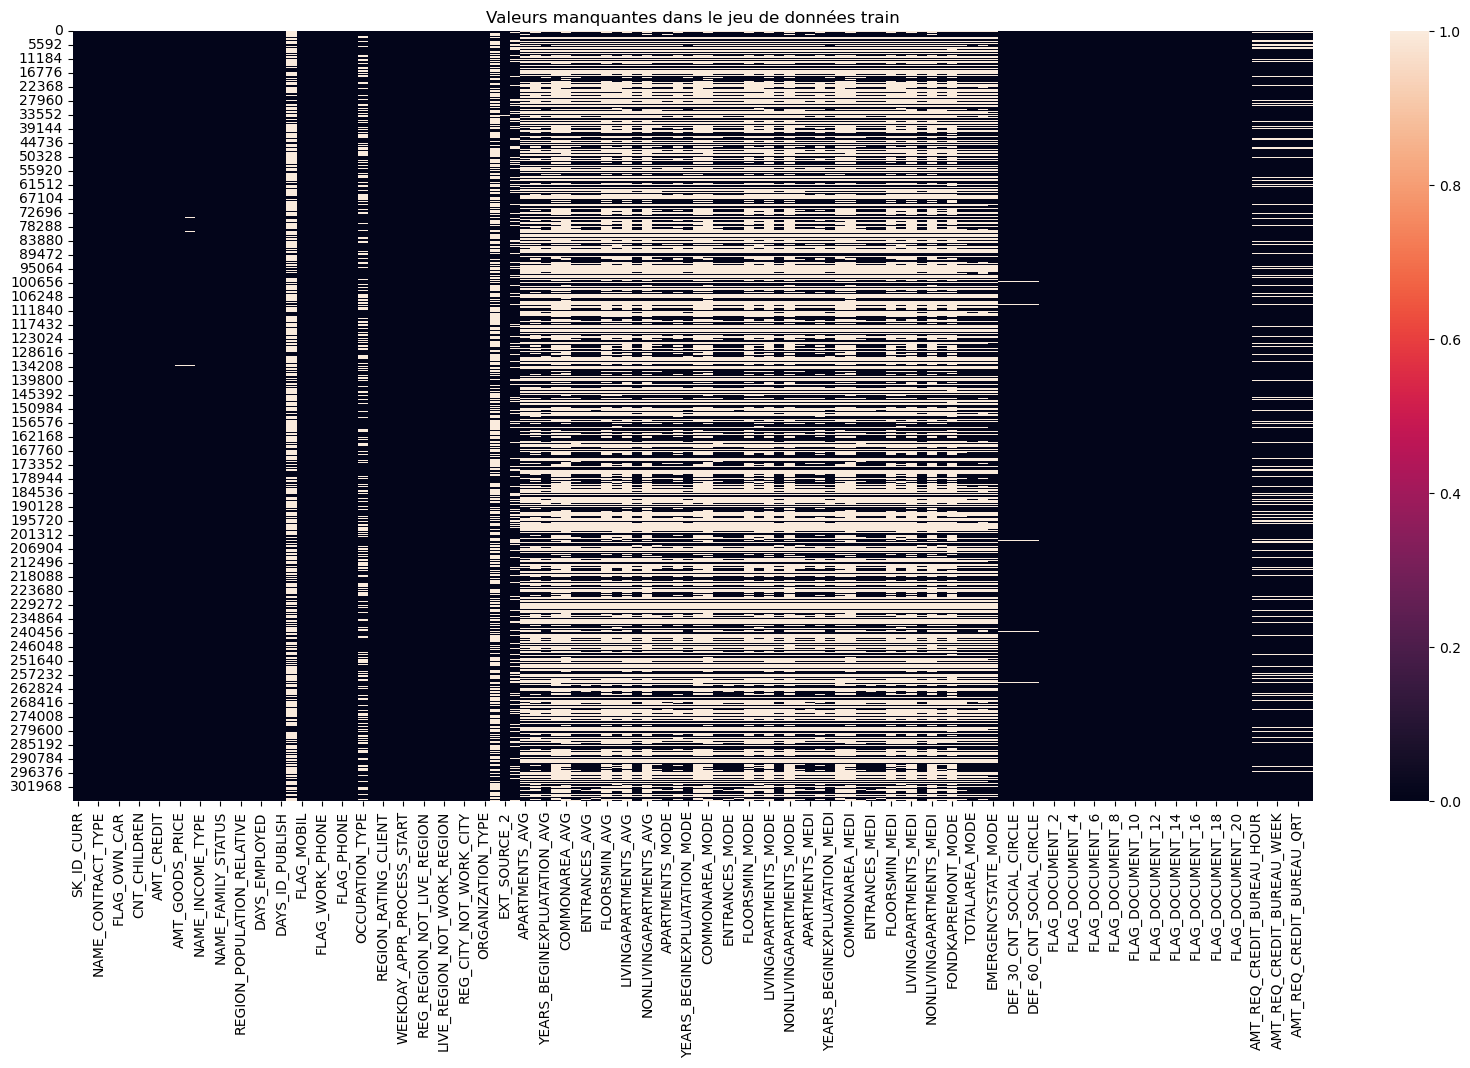

In [23]:
# Analyse nature des variables


# Définition du titre
title = {"family": "Arial",
         "color":  "black",
         "weight": "bold",
         "size": 18}

# Création d'un heatmap pour visualiser les valeurs manquantes du train
plt.figure(figsize=(20,10))
sns.heatmap(train.isnull())

# Affichage du titre
plt.title("Valeurs manquantes dans le jeu de données train") 

# Affichage du graphique
plt.show()

In [24]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Le jeu de données contient " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes présentant des valeurs manquantes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(train)
missing_values


Le jeu de données contient 122 colonnes.
Il y a 67 colonnes présentant des valeurs manquantes.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Nous pouvons analyser une présence de plusieurs groupes bien distincts concernant les valeurs manquantes :
- les colonnes sans valeurs manquantes (57 colonnes),
- les colonnes avec moins de 30% de valeurs manquantes (14 colonnes)
- les colonnes entre 30 et 60% de valeurs manquantes (33 colonnes)
- les colonnes avec plus de 60% de valeurs manquantes (17 colonnes.

Nous pouvons ici émettre plusieurs hypothèses dans le cadre d'un traitement de ces données :
- suppression des colonnes avec des valeurs manquantes (perte de nombreuses variables de qualités),
- suppresion d'une partie des valeurs manquantes (suppression du groupe supérieur à 60%),
- suppression de plusieurs groupes de valeurs manquantes.

Nous allons prendre la décision suivante :
- suppression du groupe de données avec plus de 60% de valeurs manquantes,
- imputation des données manquantes selon la technique du KNNImputer.

De plus, cette solution, après analyse de l'ensemble des variables (définitions) nous indiquent que cela ne semble pas avoir un impact trop important car les données révèlent davantage d'informations sur les logements. Les autres données manquantes qui seront traitées contiennent également ce type d'informations.


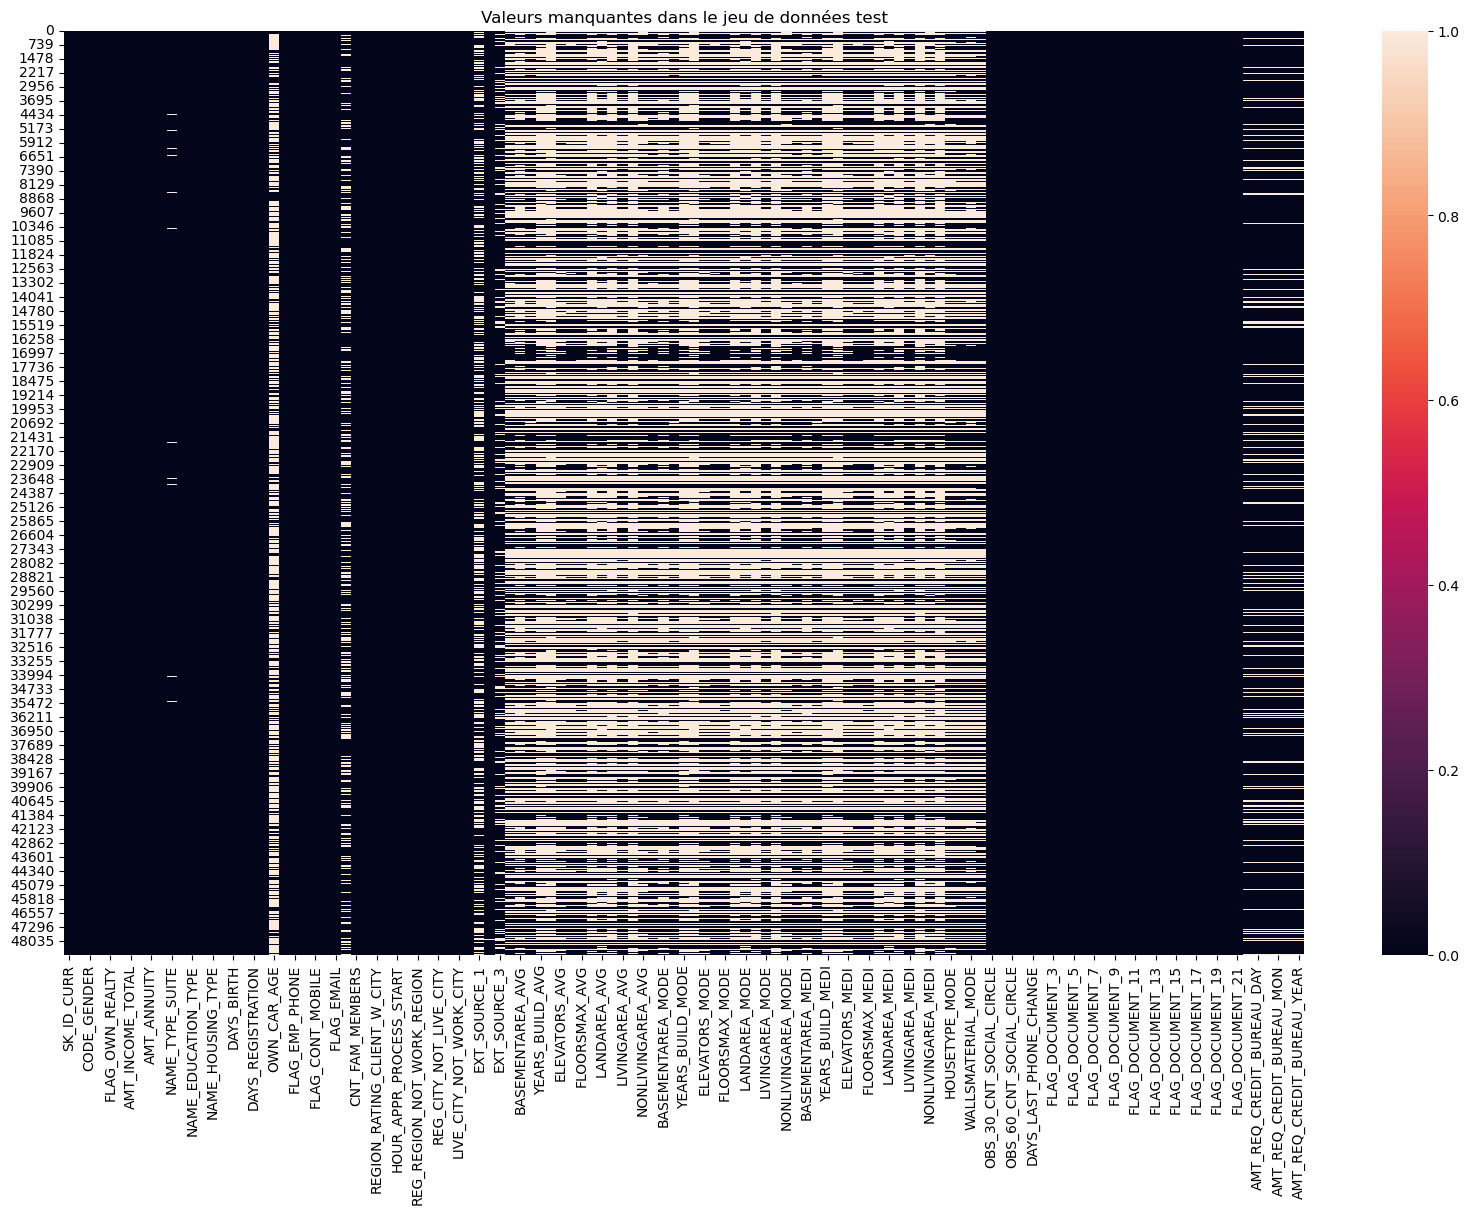

In [25]:


# Création d'un heatmap pour visualiser les valeurs manquantes du test
plt.figure(figsize=(20,12))
sns.heatmap(test.isnull())

# Affichage du titre
plt.title("Valeurs manquantes dans le jeu de données test")

# Affichage du graphique
plt.show()

In [26]:
missing_values2 = missing_values_table(test)
missing_values2.head(20)

Le jeu de données contient 121 colonnes.
Il y a 64 colonnes présentant des valeurs manquantes.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


Nos colonnes du jeu de données test présente les mêmes colonnes avec des taux très similaires pour les valeurs manquantes.
Nous allons pouvoir utiliser une fonction afin de supprimer les données.

L'imputation sera effectuée lors de l'étape du feature engineering.

#### Suppression des colonnes

In [27]:
def select_vars_less_than_60_missing(df):
    """
    Cette fonction prend un dataframe en entrée et retourne les colonnes ayant moins de 60% de valeurs manquantes.
    """
    threshold = len(df) * 0.4  # 60% du nombre total d'observations
    return df.dropna(thresh=threshold, axis=1)


# Appliquer la fonction select_vars_less_than_60_missing aux fichiers train et test
train = select_vars_less_than_60_missing(train)
test = select_vars_less_than_60_missing(test)

A présent, nous allons procéder à l'étape de l'analyse de l'ensemble des variables restantes.

### 3. Analyse des colonnes

Pour effectuer cette étape, il est avant tout essentiel de comprendre notre TARGET qui sera l'élément essentiel de notre projet. Nous allons dabord analyser cette dernière.

Ensuite, nous pourrons analyser les différentes colonnes. Pour cela, nous le ferons selon la méthode suivante :
- analyse des colonnes objets et en fonction de notre TARGET,
- analyse des colonnes numériques et en fonction de notre TARGET.

Cette méthodologie nous permettra de connaître parfaitement notre jeu de données et ainsi de pouvoir répondre de manière optimale à notre mission de modélisation.

### 3.1 Analyse de la TARGET

In [28]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

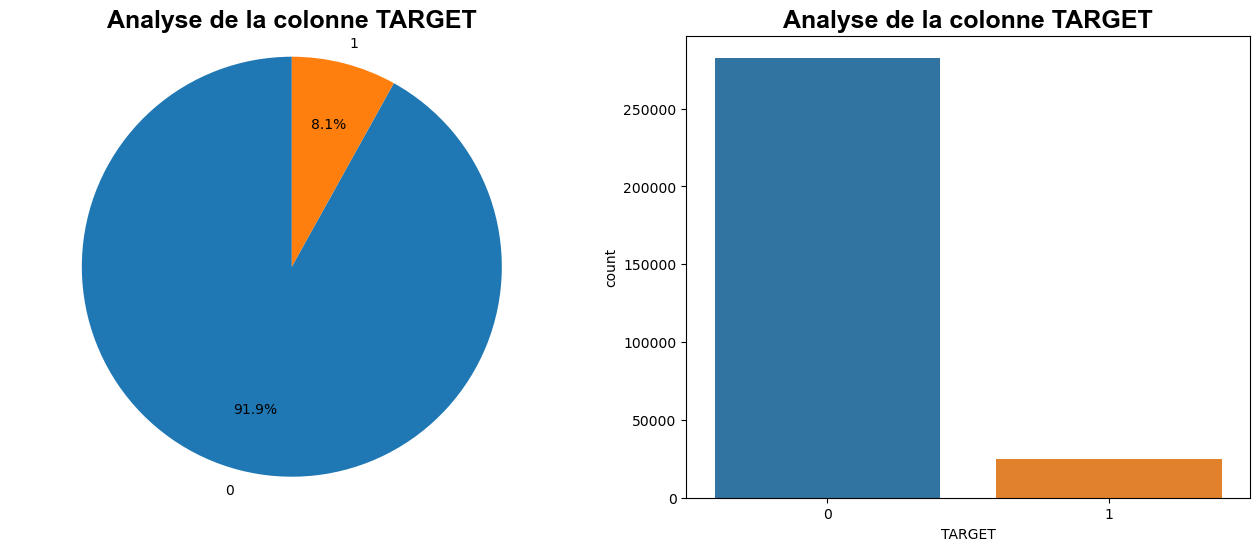

In [29]:
# Analyse nature des variables


# Définition du titre
title = {"family": "Arial",
         "color":  "black",
         "weight": "bold",
         "size": 18}


# Création d'une grille de 1 ligne et 2 colonnes pour les deux graphiques
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

# Graphique 1 : représentation en pourcentage
labels = train['TARGET'].value_counts().index.tolist()
values = train['TARGET'].value_counts().values.tolist()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7)
ax1.set_title("Analyse de la colonne TARGET", fontdict=title)
ax1.axis('equal')

# Graphique 2 : représentation en nombre
sns.countplot(x='TARGET', data=train, ax=ax2)
ax2.set_title("Analyse de la colonne TARGET", fontdict=title)

# Affichage des graphiques
plt.show()


Nous pouvons de suite constater que notre jeu de données est très fortement déséquilibré.

Cette situation va avoir un impact très important sur notre analyse de données. Il sera fondamentale de traiter cette problématique lors de notre modélisation.

### 3.2 Analyse des colonnes catégorielles

In [30]:
# Sélection des colonnes catégorielles

obj_cols = train.select_dtypes(include=['object']).columns
train_obj = train[obj_cols]

train_obj.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No


In [31]:
# comptage le nombre de valeurs uniques dans chaque colonne

for col in train_obj.columns:
    print(col, train_obj[col].nunique())

NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 18
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58
HOUSETYPE_MODE 3
WALLSMATERIAL_MODE 7
EMERGENCYSTATE_MODE 2


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


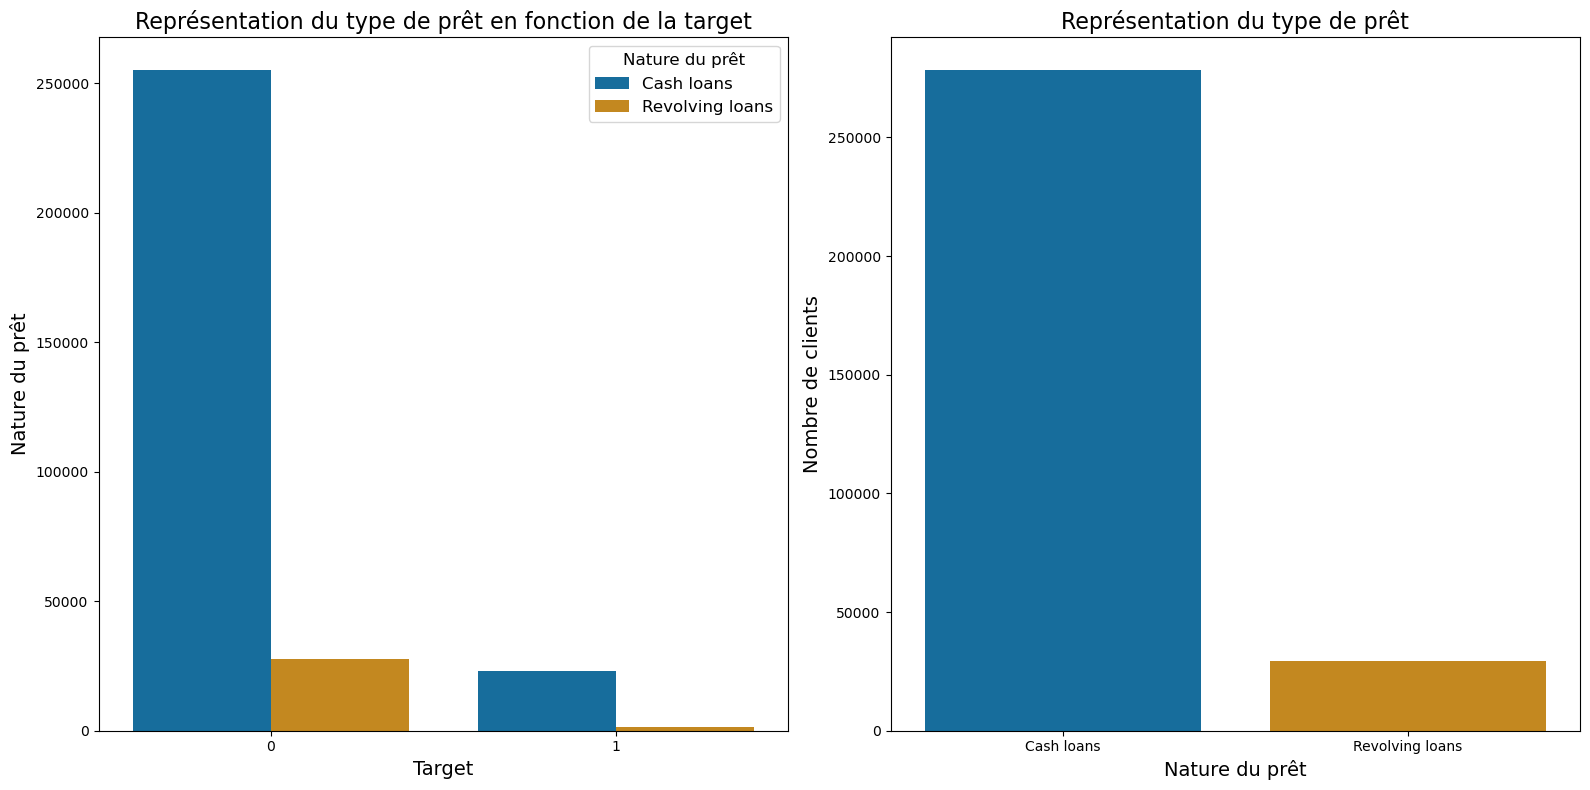

In [32]:
# Analyse de la variable NAME_CONTRACT_TYPE
print(train['NAME_CONTRACT_TYPE'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation du type de prêt en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['NAME_CONTRACT_TYPE'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation du type de prêt en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nature du prêt', fontsize=14)
axs[0].legend(title='Nature du prêt', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['NAME_CONTRACT_TYPE'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation du type de prêt', fontsize=16)
axs[1].set_xlabel('Nature du prêt', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne présente la nature des prêts. Cette dernière est très importante dans le cadre de notre analyse, nous allons la conserver.
On peut constater la très forte présence des prêts à la consommation et à plus faible échelle, les prêts renouvelables.

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


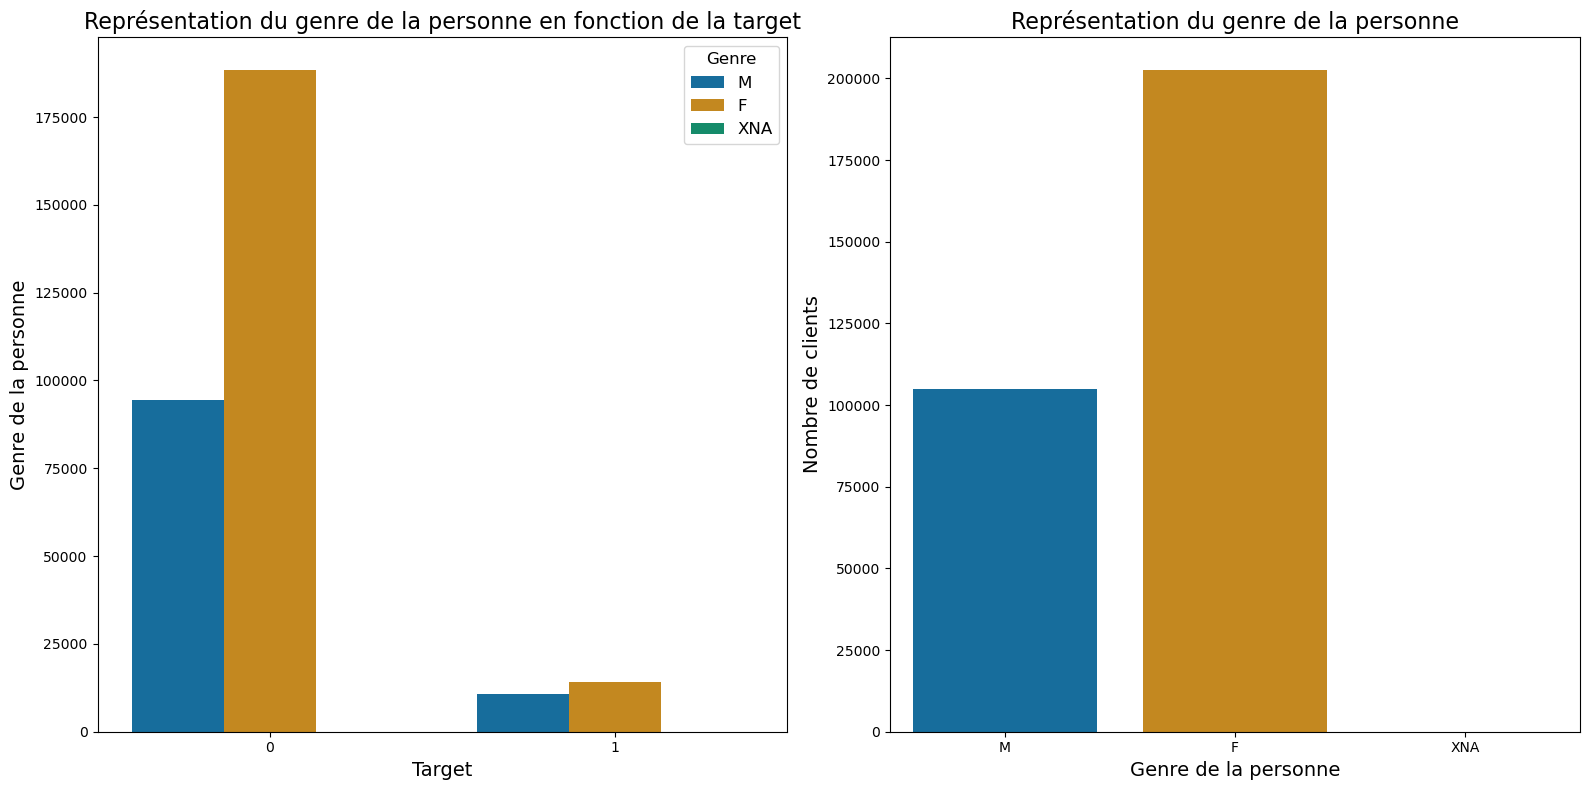

In [33]:
# Analyse de la variable CODE_GENDER
print(train['CODE_GENDER'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['CODE_GENDER'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation du genre de la personne en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Genre de la personne', fontsize=14)
axs[0].legend(title='Genre', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['CODE_GENDER'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation du genre de la personne', fontsize=16)
axs[1].set_xlabel('Genre de la personne', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne présente le genre des clients. Notre jeu de données indique une plus forte présence de femmes. Un constat est que pour les financements avec difficultés de paiements, on tend à avoir un équilibre entre les femmes et les hommes. De plus, notre constat est la présence de 4 clients non genrés.


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


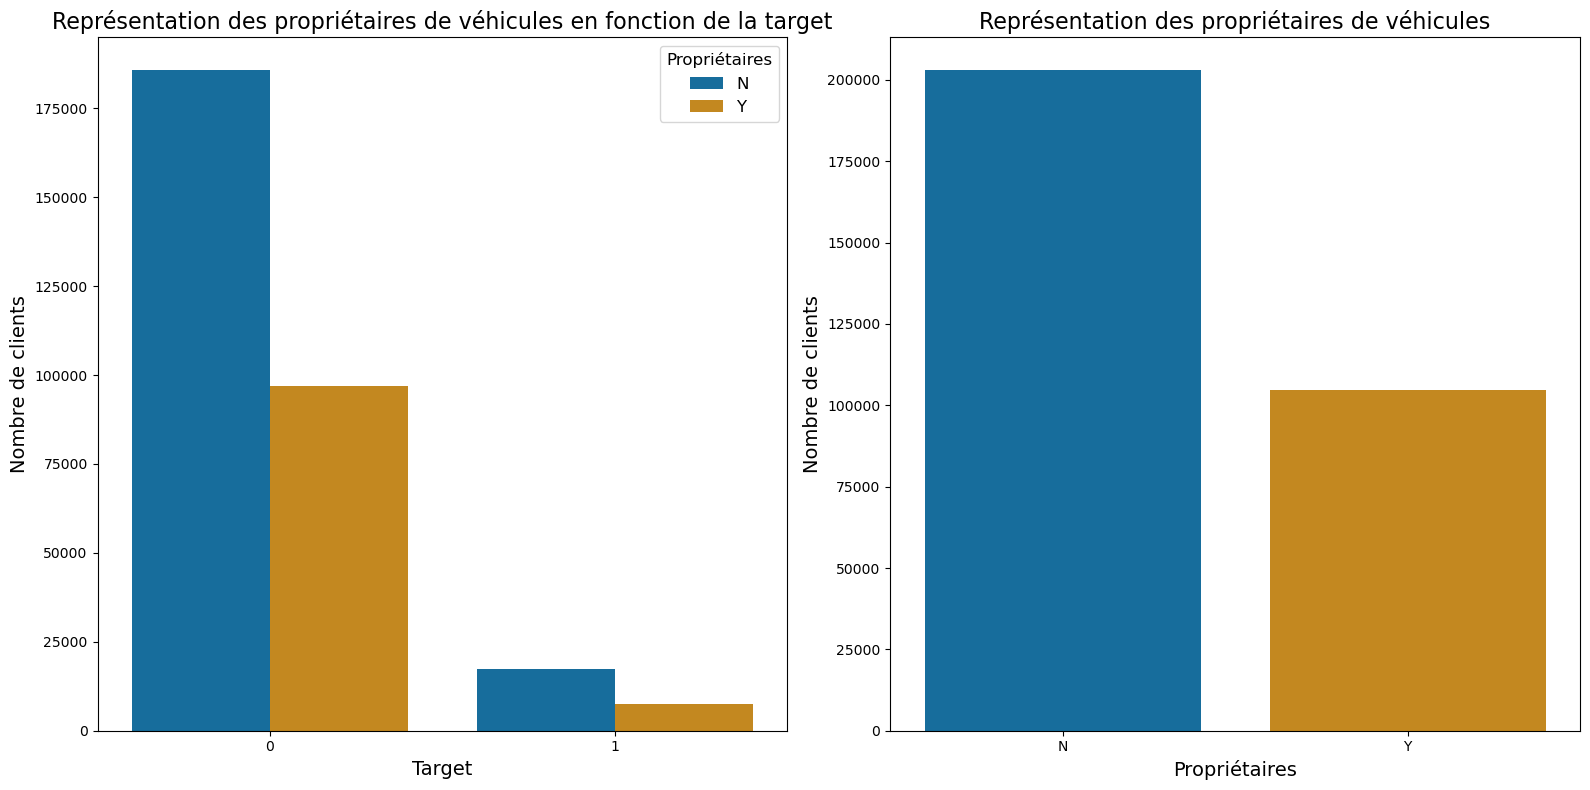

In [34]:
# Analyse de la variable FLAG_OWN_CAR
print(train['FLAG_OWN_CAR'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['FLAG_OWN_CAR'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation des propriétaires de véhicules en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nombre de clients', fontsize=14)
axs[0].legend(title='Propriétaires', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['FLAG_OWN_CAR'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation des propriétaires de véhicules', fontsize=16)
axs[1].set_xlabel('Propriétaires', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne indique si le client est propriétaire d'un véhicule. Cette donnée est plutôt intéressante afin d'avoir une meilleure connaissance du patrimoine du client. La proportion vis à vis de la TARGET est cohérent aux données.
Nous allons conserver cette colonne.

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


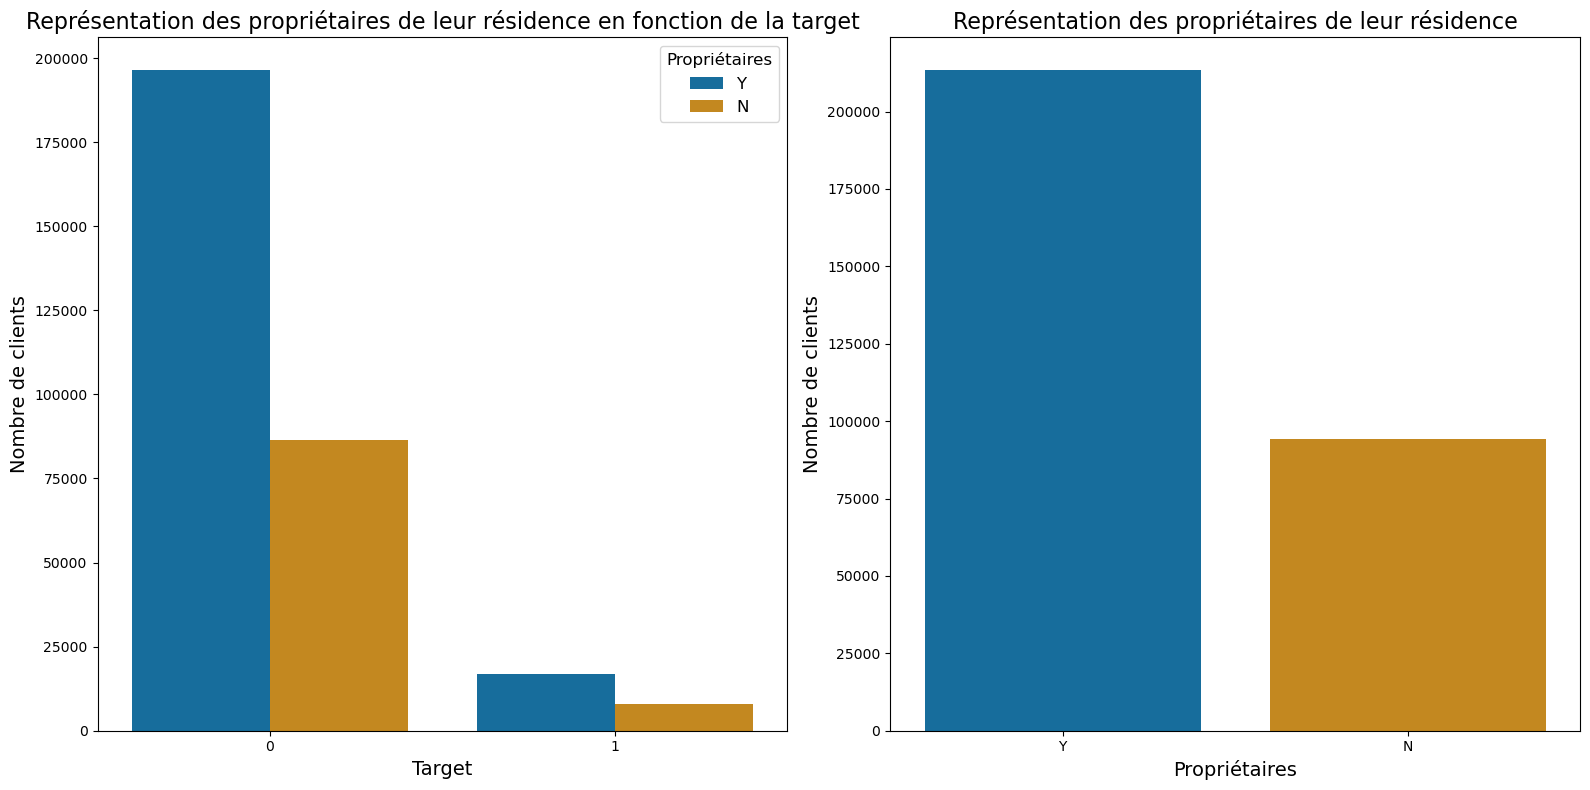

In [35]:
# Analyse de la variable FLAG_OWN_REALTY
print(train['FLAG_OWN_REALTY'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['FLAG_OWN_REALTY'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation des propriétaires de leur résidence en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nombre de clients', fontsize=14)
axs[0].legend(title='Propriétaires', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['FLAG_OWN_REALTY'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation des propriétaires de leur résidence', fontsize=16)
axs[1].set_xlabel('Propriétaires', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne indique si le client est propriétaire. Cette donnée est très importante car va nous permettre d'avoir la connaissance du patrimoine d'un client. Nous allons conserver cette colonne.

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


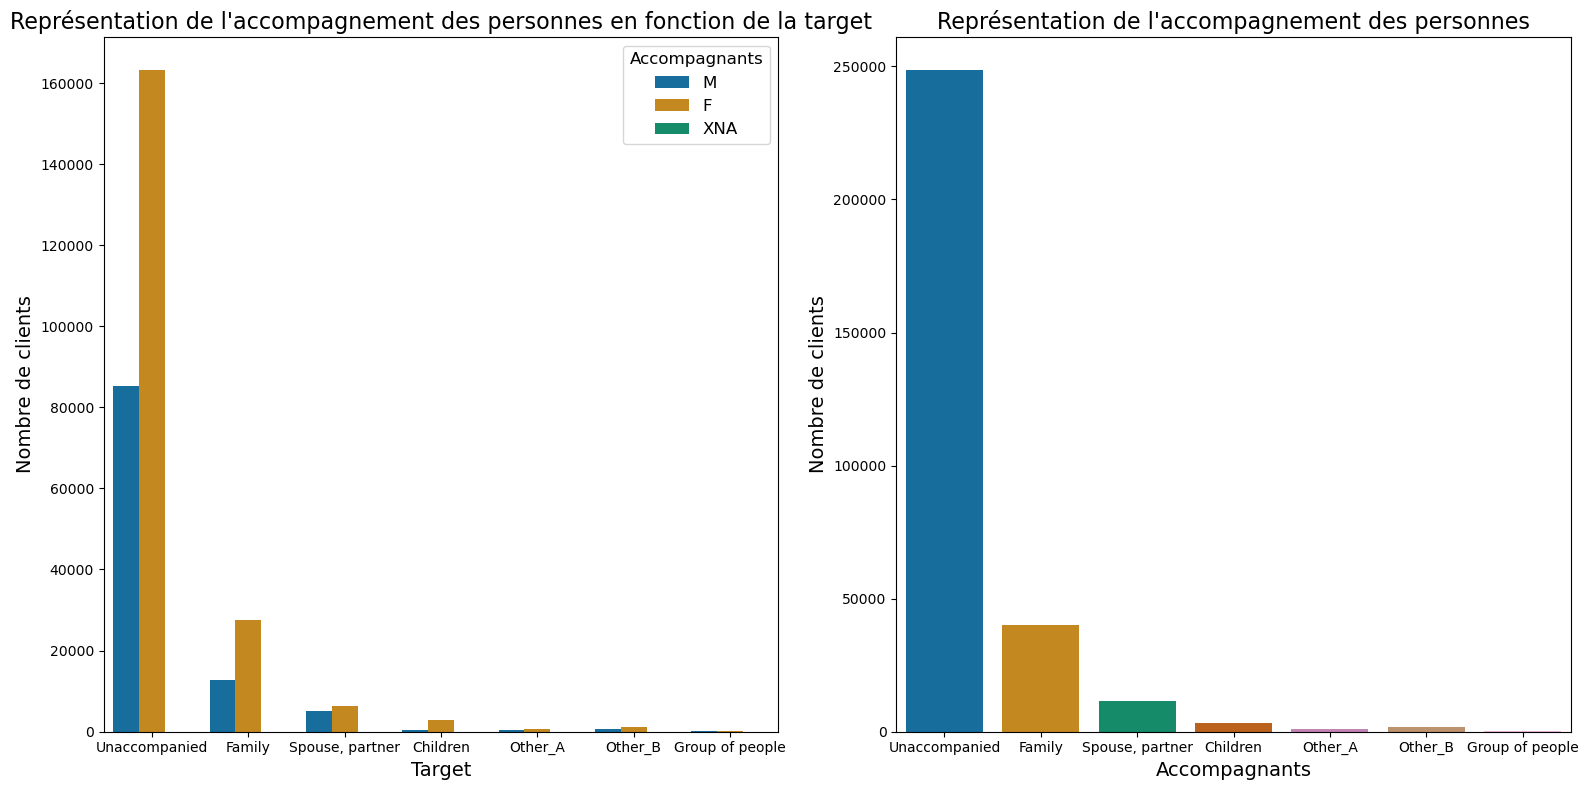

In [36]:
# Analyse de la variable NAME_TYPE_SUITE
print(train['NAME_TYPE_SUITE'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['NAME_TYPE_SUITE'], hue=train['CODE_GENDER'], ax=axs[0], palette="colorblind")
axs[0].set_title("Représentation de l'accompagnement des personnes en fonction de la target", fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nombre de clients', fontsize=14)
axs[0].legend(title='Accompagnants', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['NAME_TYPE_SUITE'], ax=axs[1], palette="colorblind")
axs[1].set_title("Représentation de l'accompagnement des personnes", fontsize=16)
axs[1].set_xlabel('Accompagnants', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne indique comment le client est venu lors de son entretien (seul, en famille, ...). Cette donnée ne semble pas pertinente dans le cadre de notre analyse, nous allons supprimer cette colonne.

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


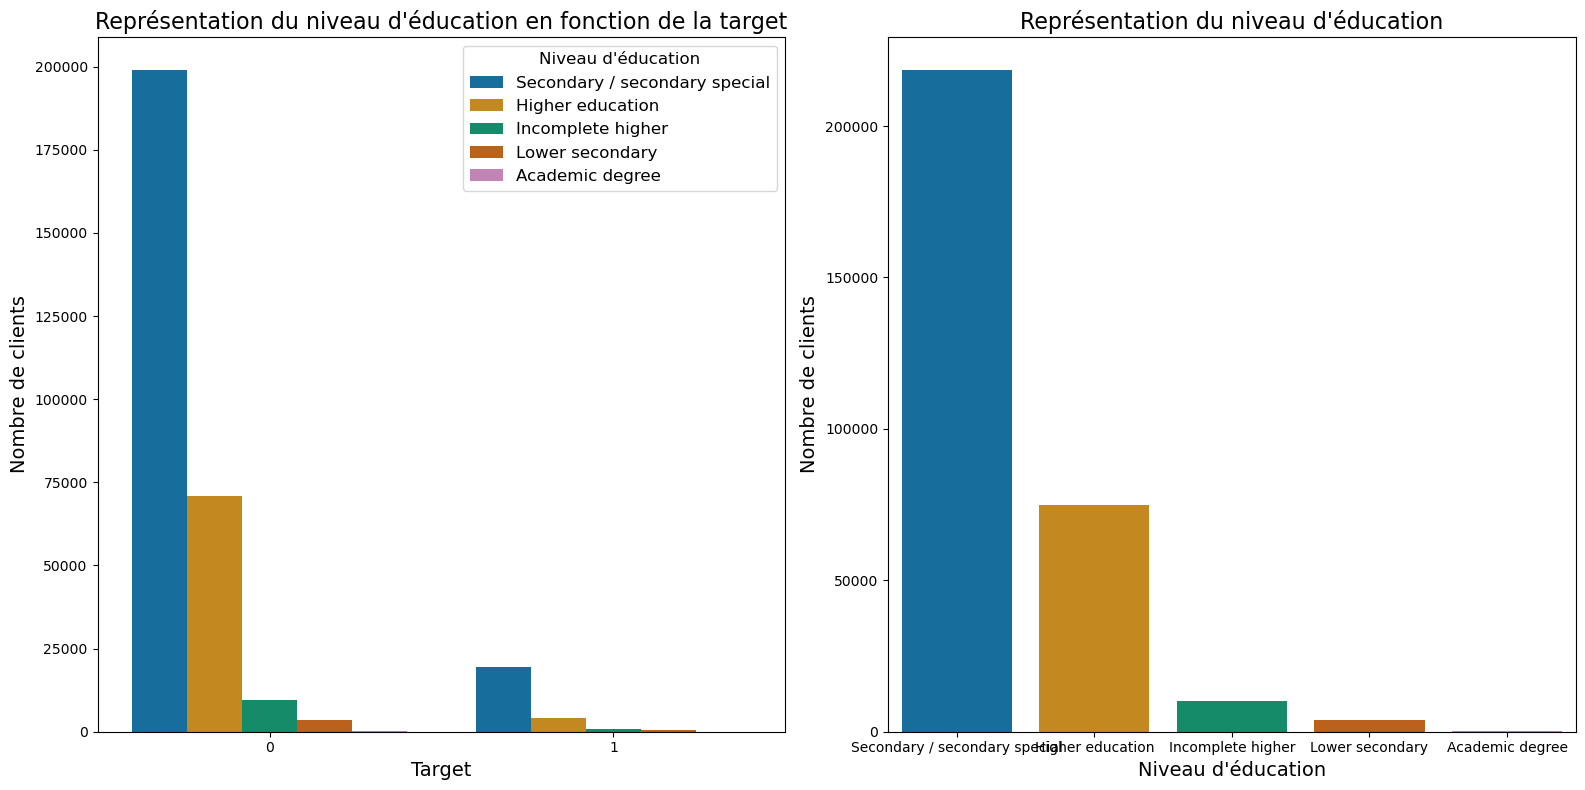

In [37]:
# Analyse de la variable NAME_EDUCATION_TYPE
print(train['NAME_EDUCATION_TYPE'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['NAME_EDUCATION_TYPE'], ax=axs[0], palette="colorblind")
axs[0].set_title("Représentation du niveau d'éducation en fonction de la target", fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nombre de clients', fontsize=14)
axs[0].legend(title="Niveau d'éducation", fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['NAME_EDUCATION_TYPE'], ax=axs[1], palette="colorblind")
axs[1].set_title("Représentation du niveau d'éducation", fontsize=16)
axs[1].set_xlabel("Niveau d'éducation", fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne présente le niveau d'études de la part des clients. Cette donnée permet d'effectuer une première hypothèse sur le jeu de données. 
A savoir, plus les clients ont effectués des études supérieures, plus le risque de présenter des difficultés de paiement semble diminuer. Cela peut être dû aux emplois ou aux revenus qui peuvent différer selon les études.
Nous allons conserver cette colonne.

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


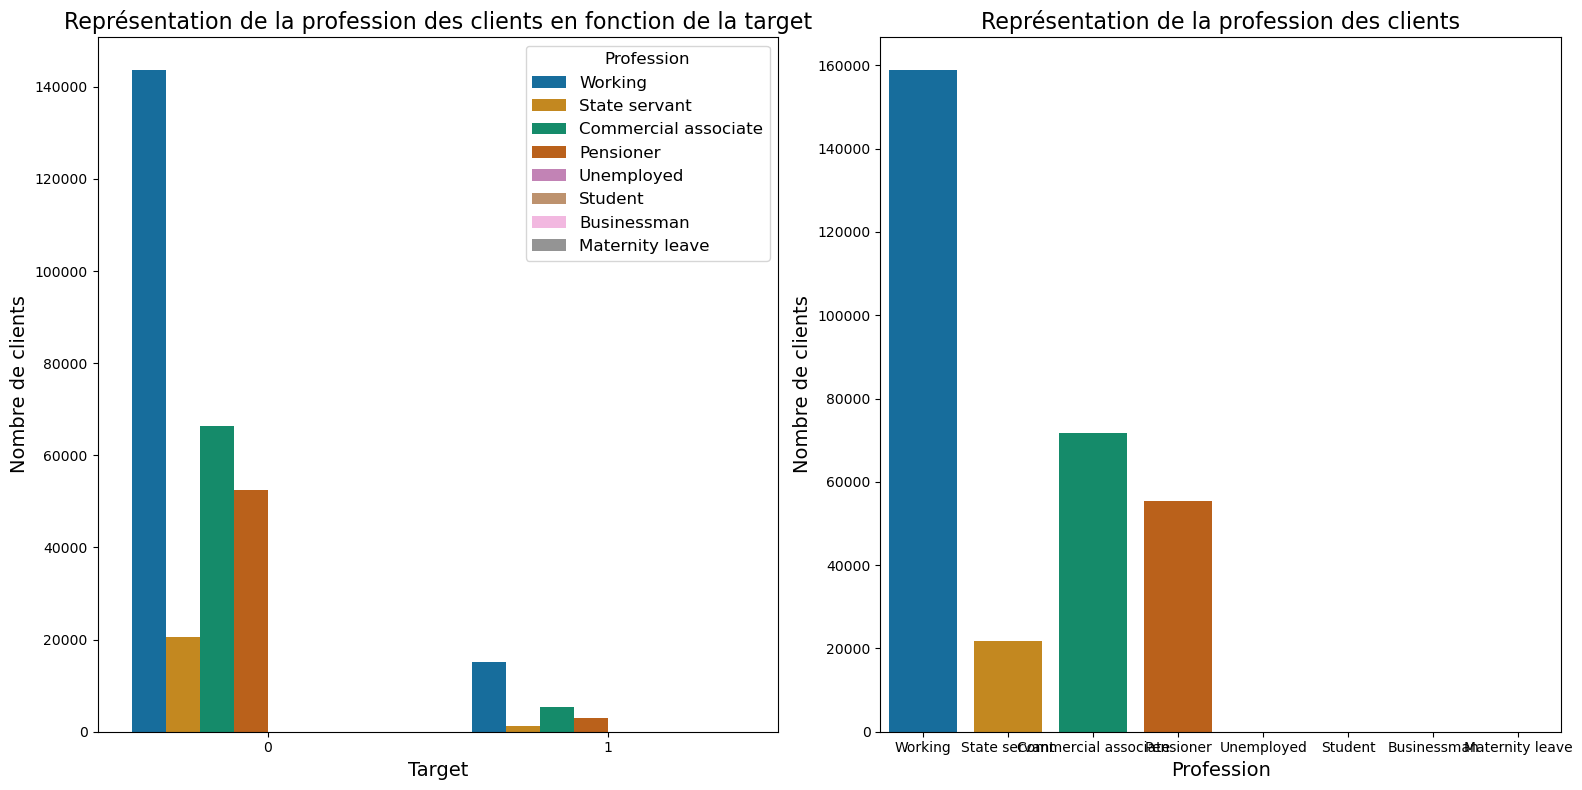

In [38]:
# Analyse de la variable NAME_INCOME_TYPE
print(train['NAME_INCOME_TYPE'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['NAME_INCOME_TYPE'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation de la profession des clients en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nombre de clients', fontsize=14)
axs[0].legend(title='Profession', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['NAME_INCOME_TYPE'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation de la profession des clients', fontsize=16)
axs[1].set_xlabel('Profession', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne indique l'emploi de nos clients. Il est intéressant de constater la présence de quelques clients (55 clients).

Nous avons pour cette colonne deux possibilités :
- supprimer les 55 lignes pour éviter trop de données qui semblent donner trop de données avec peu de résultats,
- modifier la colonne.

Nous allons prendre la décision de supprimer les 55 lignes pour ne conserver que les 4 variables avec un plus grand nombre de clients.

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


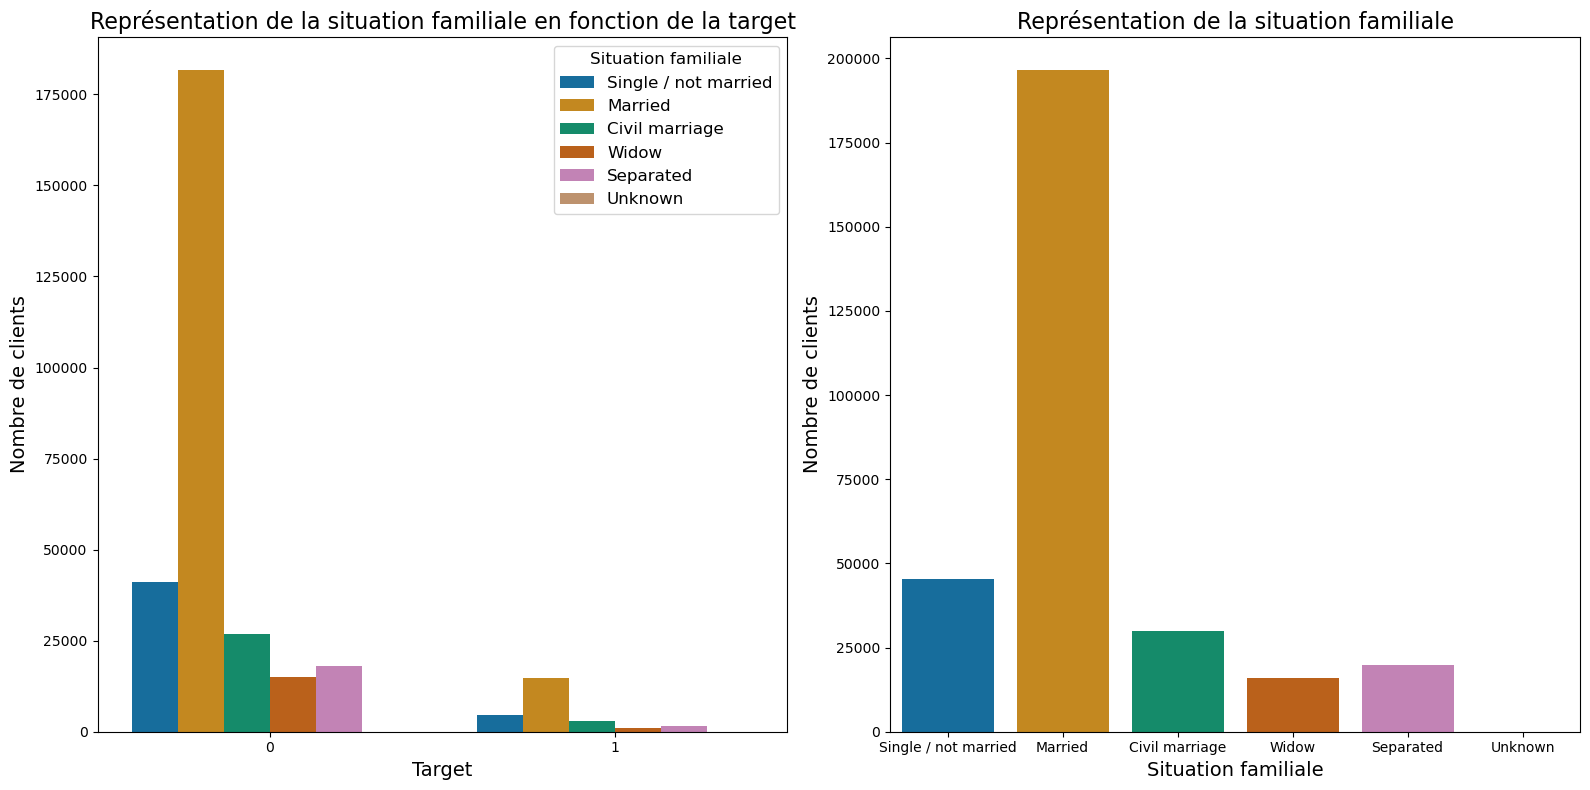

In [39]:
# Analyse de la variable NAME_FAMILY_STATUS
print(train['NAME_FAMILY_STATUS'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['NAME_FAMILY_STATUS'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation de la situation familiale en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nombre de clients', fontsize=14)
axs[0].legend(title='Situation familiale', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['NAME_FAMILY_STATUS'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation de la situation familiale', fontsize=16)
axs[1].set_xlabel('Situation familiale', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne présente la situation familiale de nos clients. Cette dernière est très importante pour notre analyse et sera bien conservée.

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


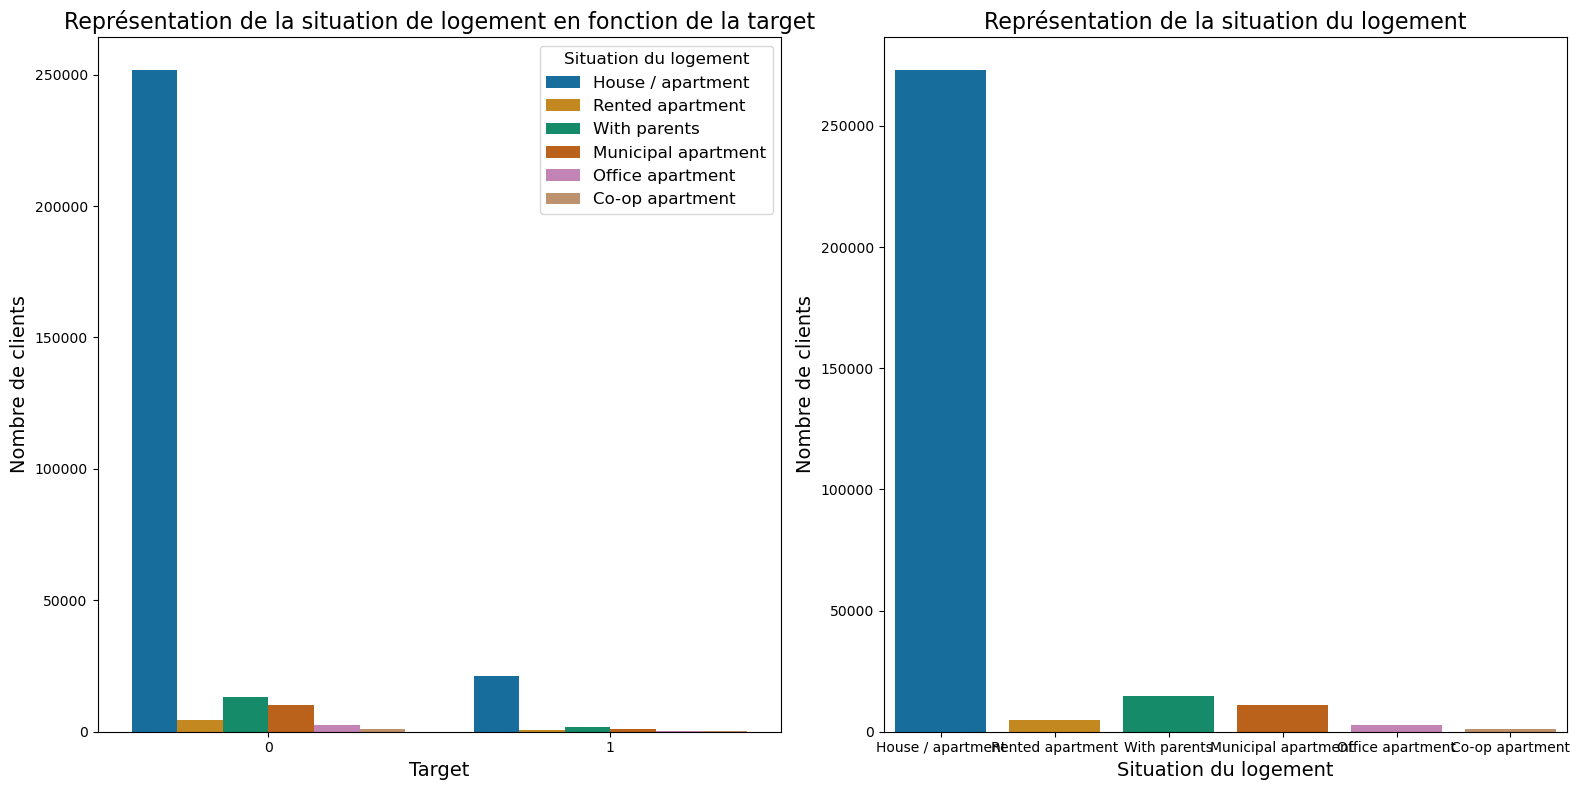

In [40]:
# Analyse de la variable NAME_HOUSING_TYPE
print(train['NAME_HOUSING_TYPE'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['NAME_HOUSING_TYPE'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation de la situation de logement en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nombre de clients', fontsize=14)
axs[0].legend(title='Situation du logement', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['NAME_HOUSING_TYPE'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation de la situation du logement', fontsize=16)
axs[1].set_xlabel('Situation du logement', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne présente la situation de logement de nos clients. Cette variable peut présenter l'avantage de préciser une situation. Nous allons conserver cette colonne.

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


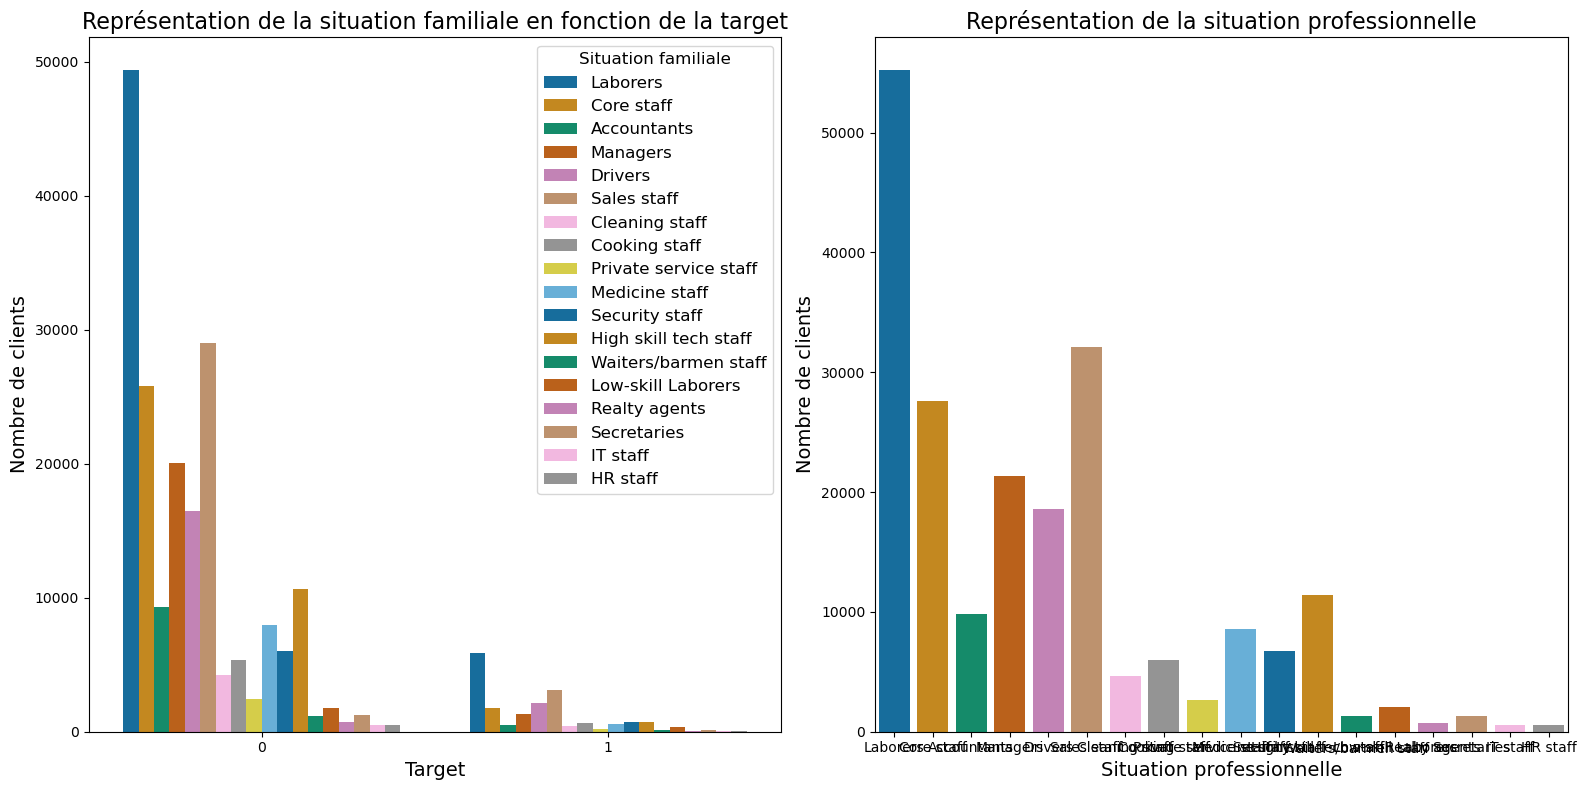

In [41]:
# Analyse de la variable OCCUPATION_TYPE
print(train['OCCUPATION_TYPE'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['OCCUPATION_TYPE'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation de la situation familiale en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nombre de clients', fontsize=14)
axs[0].legend(title='Situation familiale', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['OCCUPATION_TYPE'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation de la situation professionnelle', fontsize=16)
axs[1].set_xlabel('Situation professionnelle', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne précise la profession de nos clients. Cette dernière va nous permettre d'avoir une meilleure connaissance des clients. Nous allons conserver cette dernière.

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


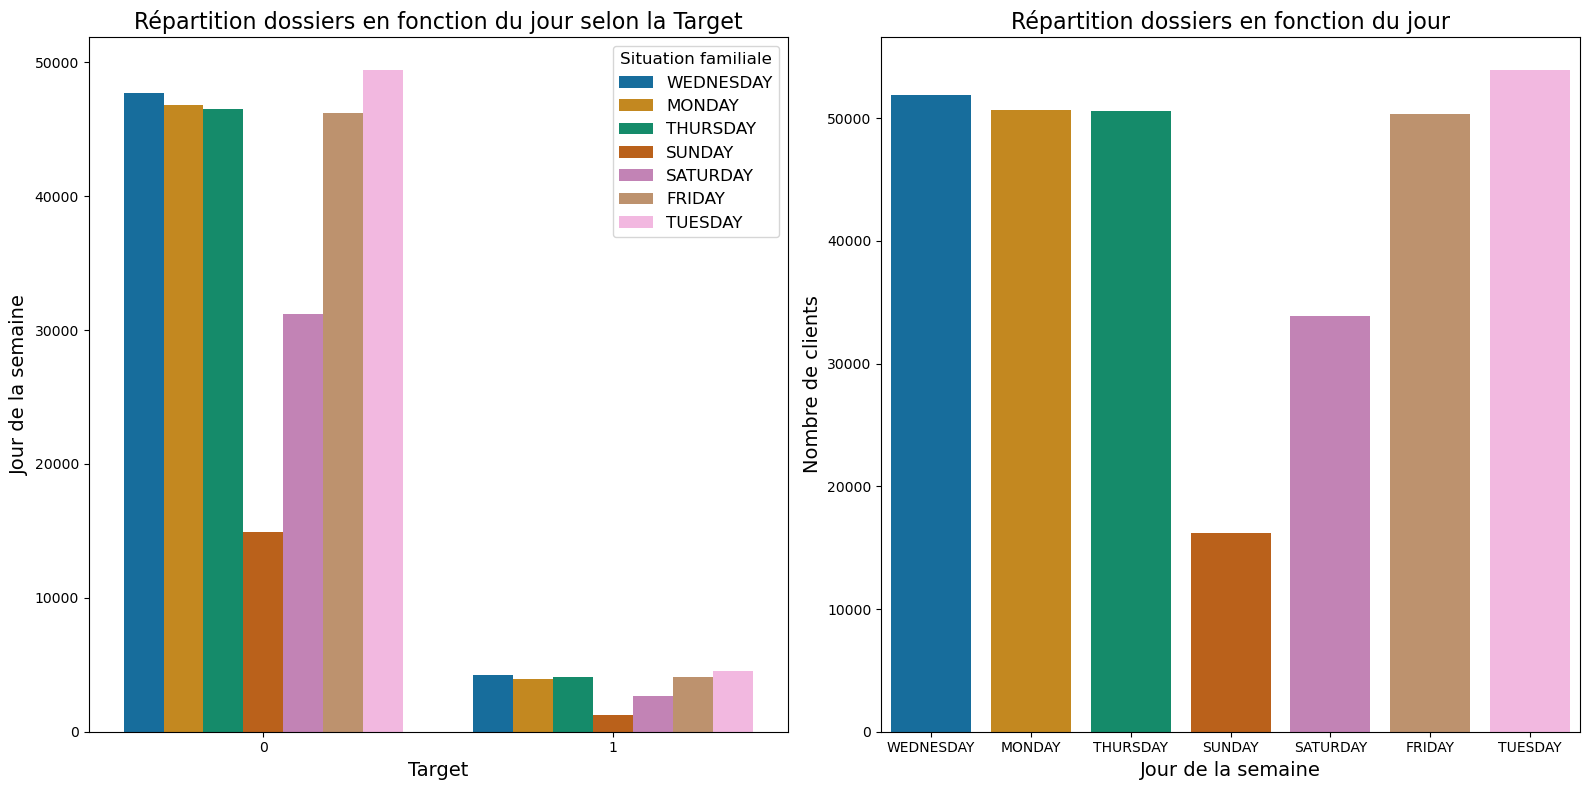

In [42]:
# Analyse de la variable WEEKDAY_APPR_PROCESS_START
print(train['WEEKDAY_APPR_PROCESS_START'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['WEEKDAY_APPR_PROCESS_START'], ax=axs[0], palette="colorblind")
axs[0].set_title('Répartition dossiers en fonction du jour selon la Target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Jour de la semaine', fontsize=14)
axs[0].legend(title='Situation familiale', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['WEEKDAY_APPR_PROCESS_START'], ax=axs[1], palette="colorblind")
axs[1].set_title('Répartition dossiers en fonction du jour', fontsize=16)
axs[1].set_xlabel('Jour de la semaine', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

In [43]:
# Analyse de la variable ORGANIZATION_TYPE
print(train['ORGANIZATION_TYPE'].value_counts())

# Cette variable a un trop grand nombres de données pour permettre une analyse

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Cette colonne précise la nature de l'entreprise pour les clients. Cette dernière est intéressante pour parfaitement connaître la situation des clients.
Nous allons conserver cette colonne.

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64


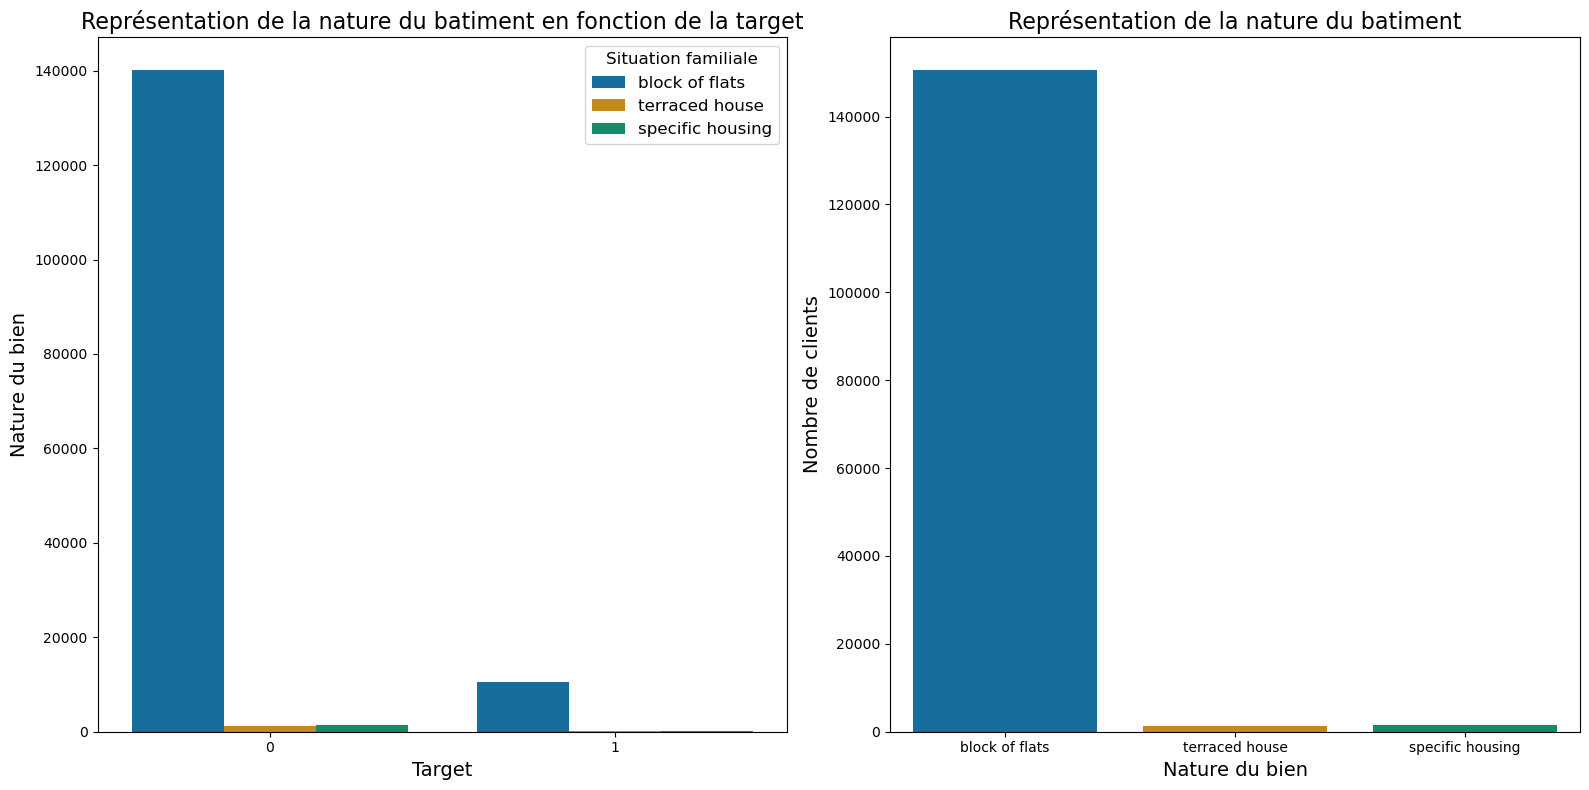

In [44]:
# Analyse de la variable NAME_EDUCATION_TYPE
print(train['HOUSETYPE_MODE'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la situation familiale en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['HOUSETYPE_MODE'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation de la nature du batiment en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nature du bien', fontsize=14)
axs[0].legend(title='Situation familiale', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la situation familiale
sns.countplot(data=train, x=train['HOUSETYPE_MODE'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation de la nature du batiment', fontsize=16)
axs[1].set_xlabel('Nature du bien', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne précise le type de batiments.

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64


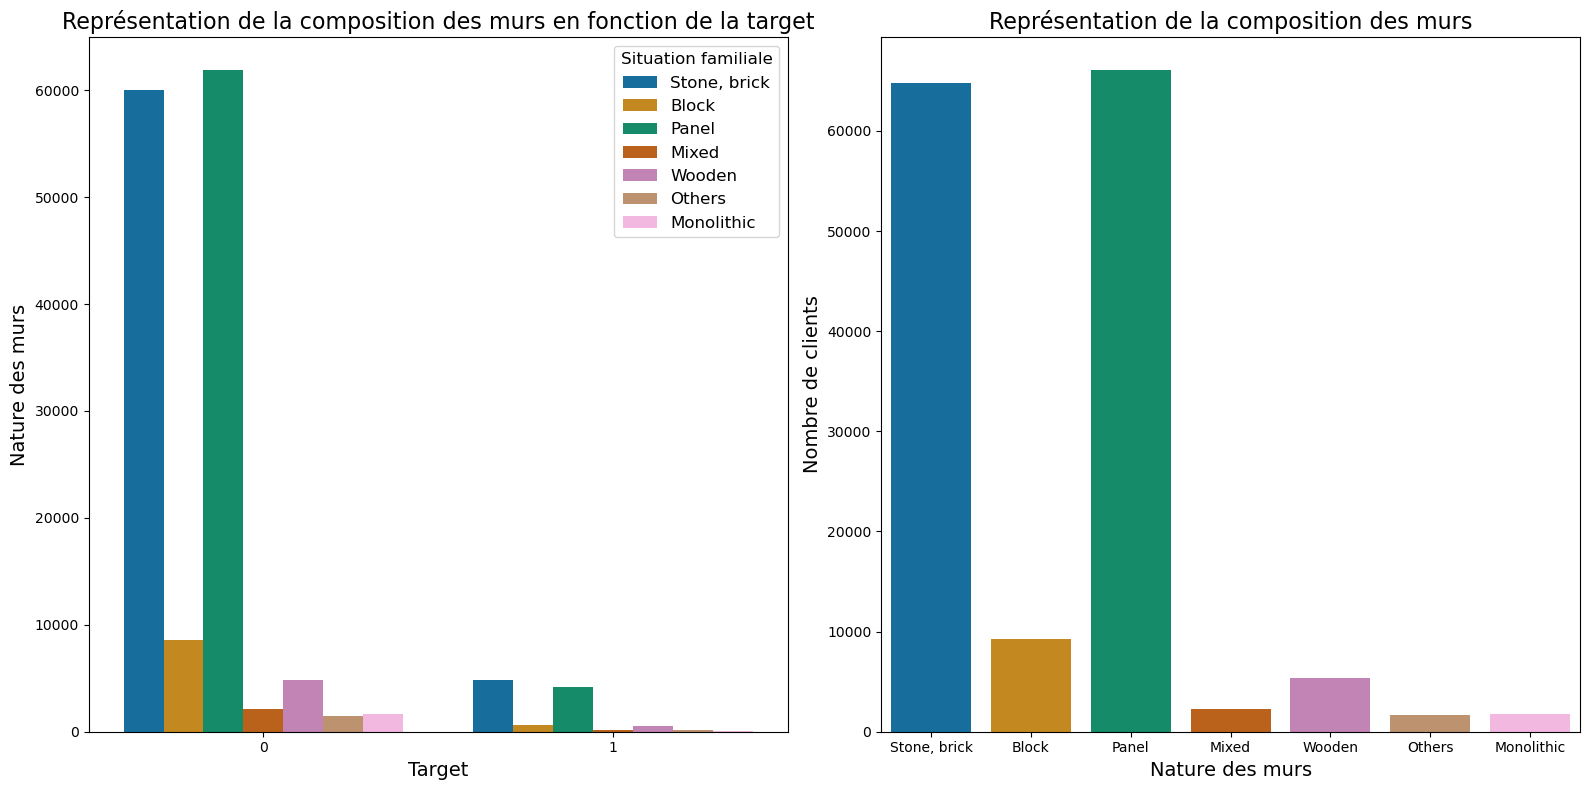

In [45]:
# Analyse de la variable WALLSMATERIAL_MODE
print(train['WALLSMATERIAL_MODE'].value_counts())

# Création des graphiques
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Graphique 1 : Représentation de la composition des murs en fonction de la target
sns.countplot(data=train, x=train['TARGET'], hue=train['WALLSMATERIAL_MODE'], ax=axs[0], palette="colorblind")
axs[0].set_title('Représentation de la composition des murs en fonction de la target', fontsize=16)
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Nature des murs', fontsize=14)
axs[0].legend(title='Situation familiale', fontsize=12, title_fontsize=12)

# Graphique 2 : Représentation de la composition des murs
sns.countplot(data=train, x=train['WALLSMATERIAL_MODE'], ax=axs[1], palette="colorblind")
axs[1].set_title('Représentation de la composition des murs', fontsize=16)
axs[1].set_xlabel('Nature des murs', fontsize=14)
axs[1].set_ylabel('Nombre de clients', fontsize=14)

plt.tight_layout()
plt.show()

Cette colonne précise la composition des murs.

Nous avons finalisé notre traitement des variables catégorielles.

L'encodage sera la dernière étape du feature engineering.

A présent, nous allons traiter les variables numériques.

### 3.3 Analyse des colonnes numériques

Notre jeu de données présente un très grand nombre de variables numériques. Il est difficile de toutes les analyser, cela risque de prendre un temps trop important et chacune peut nécessiter un traitement rendant notre modèle peu fiable.

Lors de notre prmeière analyse des données, nous avons toutefois constaté plusieurs groupes de variables assez similaire. Nous allons prendre la décision d'analyser uniquement ces dernières ainsi que quelques variables sélectionnées lors de notre analyse des définitions.


Pour notre analyse, nous étudierons les variables par plusieurs groupes :
- les colonnes 'AMT',
- les colonnes 'DAYS,
- les colonnes 'EXT_SOURCE'

Les autres colonnes seront uniquement controlées sur la distribution et sélectionner lors de l'étape de la feature sélection.

In [46]:
# Sélection des variables numériques
numeric_columns = train.select_dtypes(include=['int', 'float']).columns.tolist()
df_numeric = train[numeric_columns]
df_numeric

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.145570,0.681632,NaN,0.2021,0.0887,

#### 4.1 Analyse variables 'AMT'

In [47]:
# Sélectionner les colonnes contenant le terme "AMT"
amt_columns = [col for col in df_numeric.columns if 'AMT' in col]
df_amt = df_numeric[amt_columns]
df_amt

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Représentation de la colonne AMT_INCOME_TOTAL')

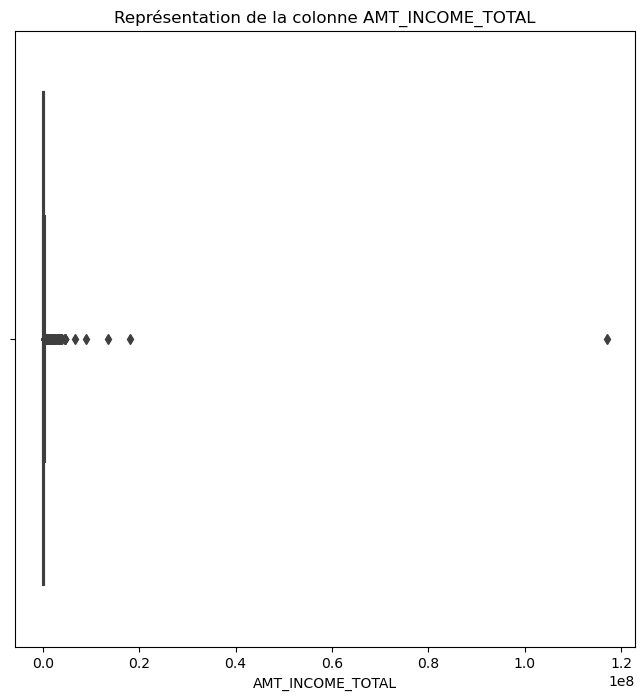

In [48]:
# Analyse AMT_INCOME_TOTAL

plt.figure(figsize = (8,8))
sns.boxplot(data = df_amt, x = 'AMT_INCOME_TOTAL')
plt.title('Représentation de la colonne AMT_INCOME_TOTAL')

Cette colonne présente une donnée avec une valeur en fort décalage. Cette colonne est essentielle dans notre analyse, nous allons la conserver mais supprimer la ligne présentant une valeur atypique.

Text(0.5, 1.0, 'Représentation de la colonne AMT_CREDIT')

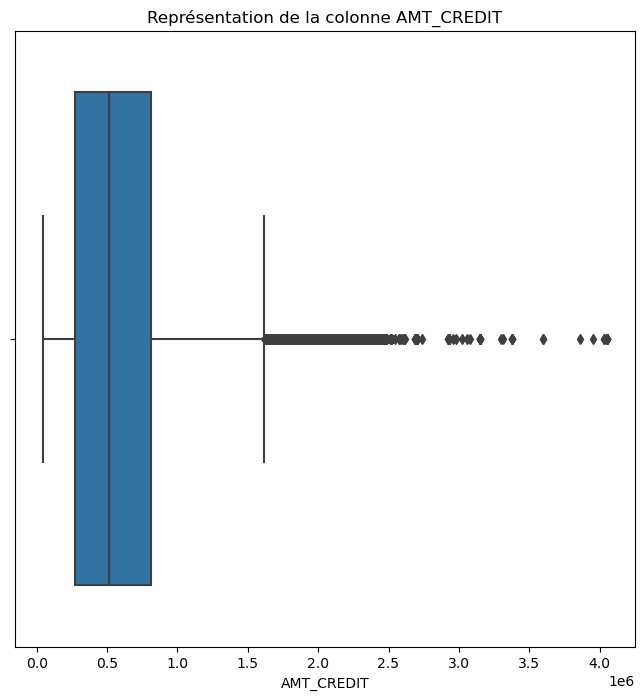

In [49]:
# Analyse AMT_CREDIT

plt.figure(figsize = (8,8))
sns.boxplot(data = df_amt, x = 'AMT_CREDIT')
plt.title('Représentation de la colonne AMT_CREDIT')

Cette colonne présente le montant des crédits, c'est donc la principale variable d'analyse.
Nous pouvons constater la présence de plusieurs valeurs aberrantes.
Ces dernières seront traitées lors de l'étape du feature engineering.

Text(0.5, 1.0, 'Représentation de la colonne AMT_ANNUITY')

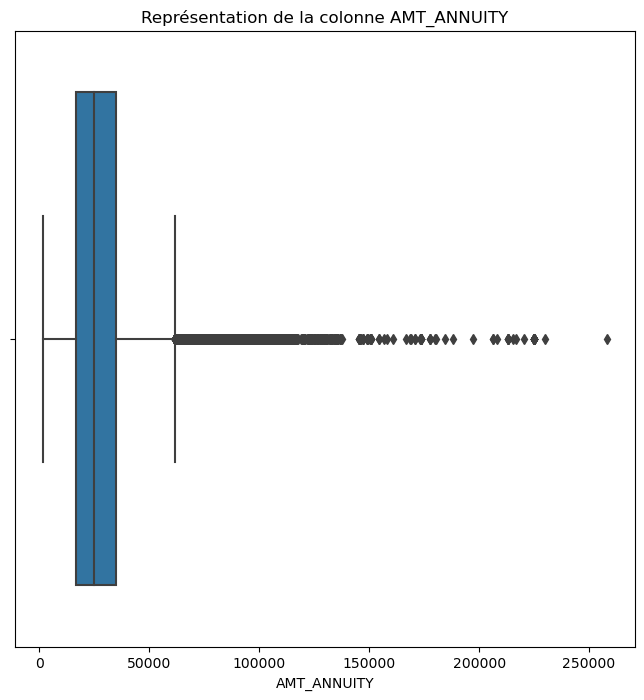

In [50]:
# Analyse AMT_ANNUITY

plt.figure(figsize = (8,8))
sns.boxplot(data = df_amt, x = 'AMT_ANNUITY')
plt.title('Représentation de la colonne AMT_ANNUITY')

Cette colonne présente le montant annuel des mensualités de prêts. C'est également une variable essentielle pour notre analyse.
Les valeurs aberrantes seront également traitées par la suite.

Text(0.5, 1.0, 'Représentation de la colonne AMT_GOODS_PRICE')

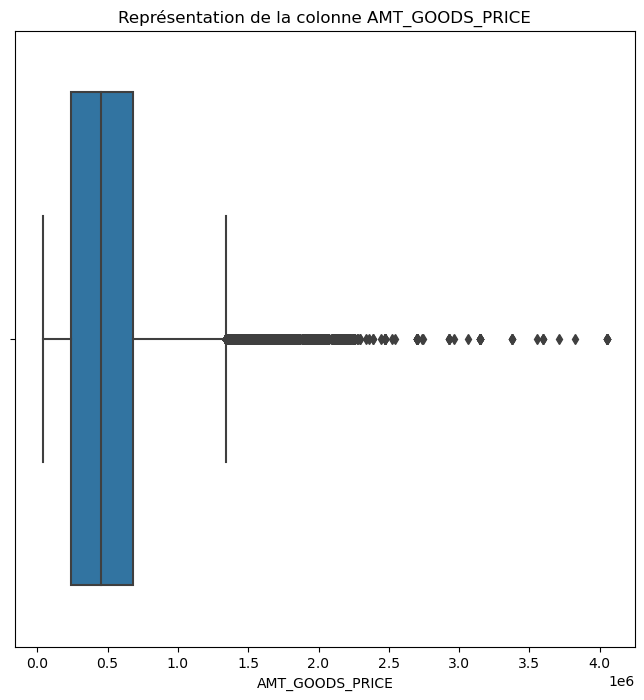

In [51]:
# Analyse AMT_GOODS_PRICE

plt.figure(figsize = (8,8))
sns.boxplot(data = df_amt, x = 'AMT_GOODS_PRICE')
plt.title('Représentation de la colonne AMT_GOODS_PRICE')

Cette dernière colonne présente la valeur des biens. Cette colonne présente également des valeurs aberrantes qui semblent similaires aux autres colonnes. Ce traitement se fera également par la suite.

#### 4.2 Analyse variables 'DAYS'

In [52]:
# Sélectionner les colonnes contenant le terme "DAYS"
amt_columns = [col for col in df_numeric.columns if 'DAYS' in col]
df_days = df_numeric[amt_columns]
df_days

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


Text(0.5, 1.0, 'Représentation de la colonne DAYS_BIRTH')

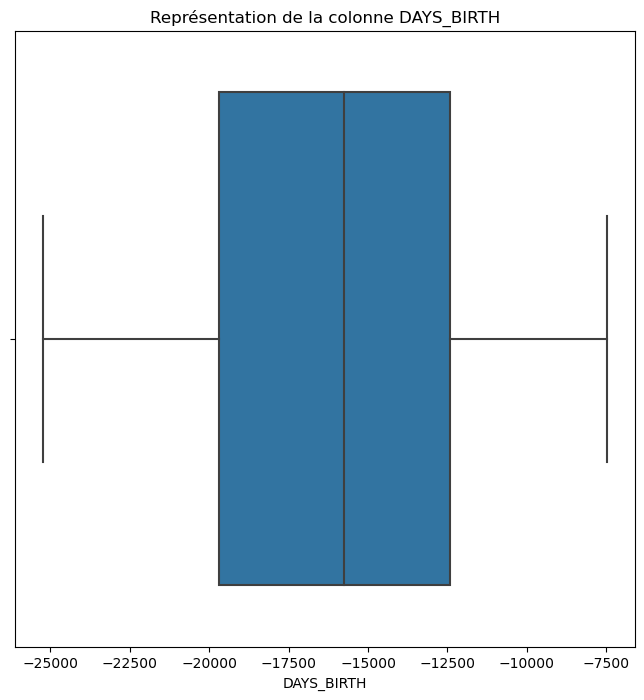

In [53]:
# Analyse DAYS_BIRTH

plt.figure(figsize = (8,8))
sns.boxplot(data = df_days, x = 'DAYS_BIRTH')
plt.title('Représentation de la colonne DAYS_BIRTH')

Cette colonne semble représenter les âges mais en nombres de jours. Nous allons conserver cette variable pour régulariser.

Text(0.5, 1.0, 'Représentation de la colonne DAYS_EMPLOYED')

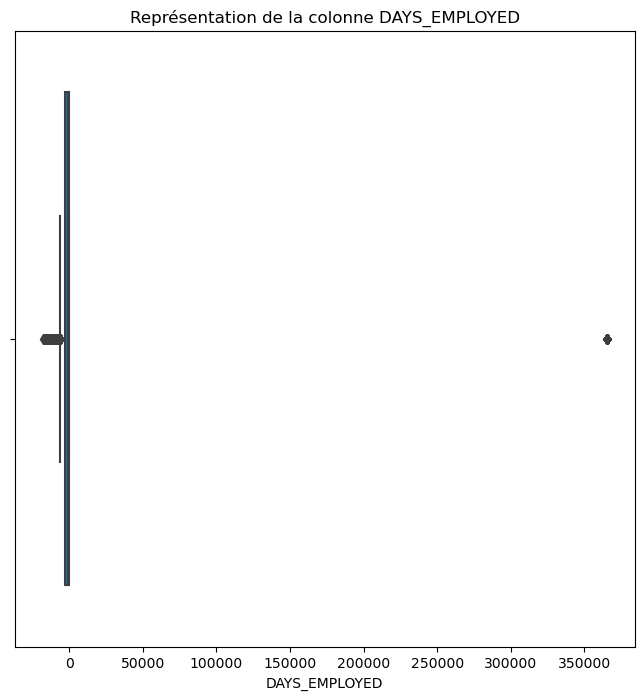

In [54]:
# Analyse DAYS_EMPLOYED

plt.figure(figsize = (8,8))
sns.boxplot(data = df_days, x = 'DAYS_EMPLOYED')
plt.title('Représentation de la colonne DAYS_EMPLOYED')

In [55]:
df_days['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

Cette colonne présente également une variable atypique en fort nombre. Afin de traiter cette variable, nous pourrons procéder à un remplacement de cette valeur par 'np.nan' puis procéder à une imputation par le KNNImputer.

Text(0.5, 1.0, 'Représentation de la colonne DAYS_REGISTRATION')

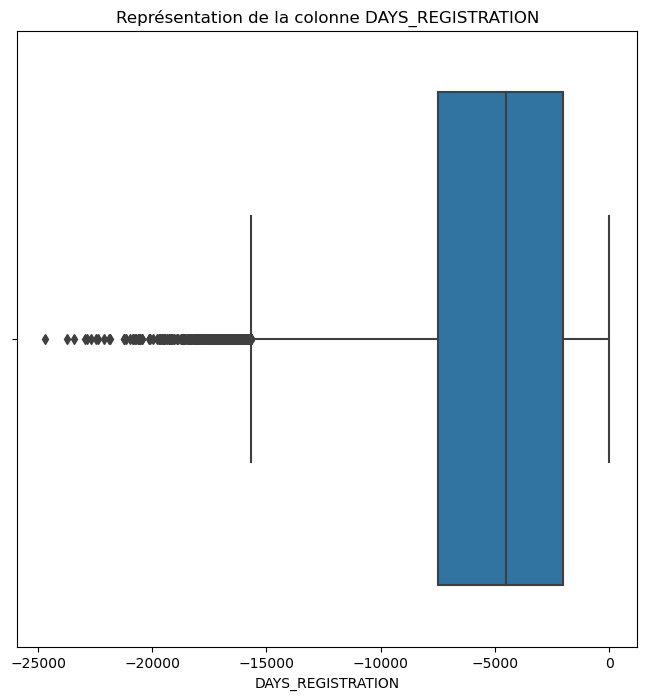

In [56]:
# Analyse DAYS_REGISTRATION

plt.figure(figsize = (8,8))
sns.boxplot(data = df_days, x = 'DAYS_REGISTRATION')
plt.title('Représentation de la colonne DAYS_REGISTRATION')

Text(0.5, 1.0, 'Représentation de la colonne DAYS_ID_PUBLISH')

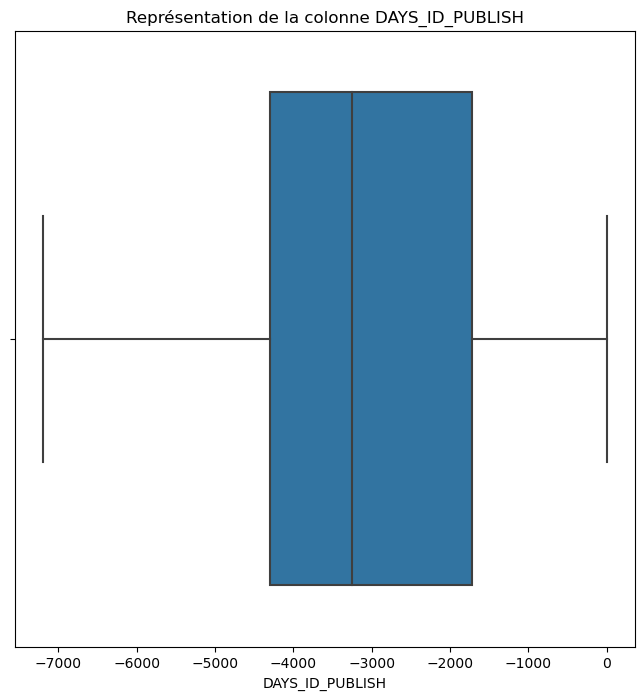

In [57]:
# Analyse DAYS_ID_PUBLISH

plt.figure(figsize = (8,8))
sns.boxplot(data = df_days, x = 'DAYS_ID_PUBLISH')
plt.title('Représentation de la colonne DAYS_ID_PUBLISH')

Text(0.5, 1.0, 'Représentation de la colonne DAYS_LAST_PHONE_CHANGE')

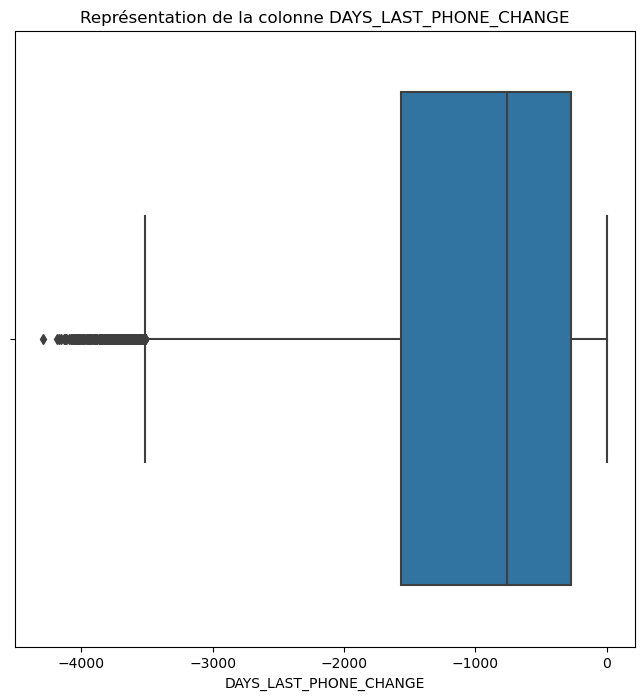

In [58]:
# Analyse DAYS_BIRTH

plt.figure(figsize = (8,8))
sns.boxplot(data = df_days, x = 'DAYS_LAST_PHONE_CHANGE')
plt.title('Représentation de la colonne DAYS_LAST_PHONE_CHANGE')

#### 4.3 Analyse EXT SOURCE

In [59]:
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

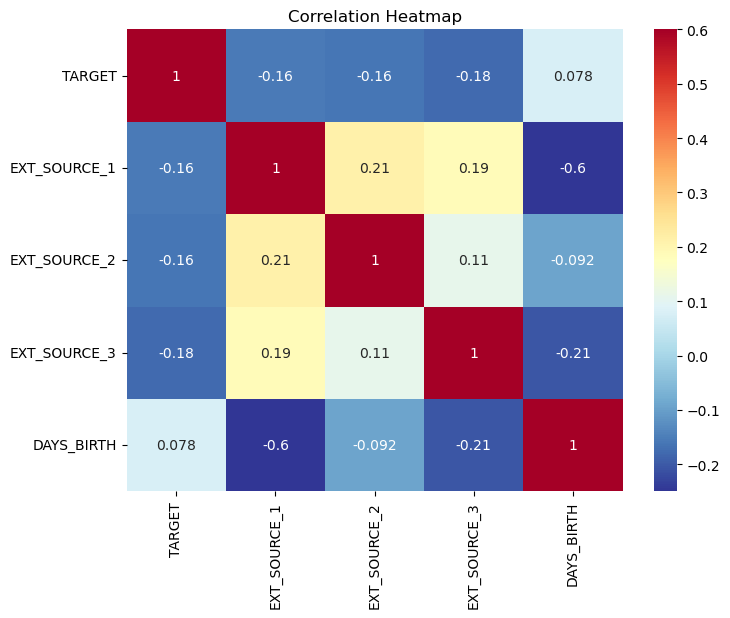

In [60]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

A présent, nous allons procéder à l'étape du Feature Engineering, voici les tâches qui seront exécutées : 
- Encodage des variables catégorielles (LabelEncoder et méthode dummies)
- Alignement du jeu de train et test,
- Modification ou transformation de différentes colonnes,
- Création des nouvelles colonnes.

In [61]:
train.to_csv('train_feat.csv')
test.to_csv('test_feat_csv')

## III. Feature Engineering

Afin de procéder à l'étape du Feature Engineering, nous avons suivi le conseil concernant Kaggle.

Un remerciement particulier à Monsieur HIKMET SEZEN

Url : https://www.kaggle.com/code/hikmetsezen/micro-model-174-features-0-8-auc-on-home-credit/notebook

### 1. Création de nouvelles variables

In [62]:
# run functions and pre_settings
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
    agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
    agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                               for e in agg_df.columns.tolist()])
    return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
    agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
    return df_to_merge.merge(agg_df, how='left', on= aggregate_by)

def do_sum(dataframe, group_cols, counted, agg_name):
    gp = dataframe[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(columns={counted: agg_name})
    dataframe = dataframe.merge(gp, on=group_cols, how='left')
    return dataframe

def reduce_mem_usage(dataframe):
    m_start = dataframe.memory_usage().sum() / 1024 ** 2
    for col in dataframe.columns:
        col_type = dataframe[col].dtype
        if col_type != object:
            c_min = dataframe[col].min()
            c_max = dataframe[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    dataframe[col] = dataframe[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    dataframe[col] = dataframe[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    dataframe[col] = dataframe[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    dataframe[col] = dataframe[col].astype(np.int64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    dataframe[col] = dataframe[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    dataframe[col] = dataframe[col].astype(np.float32)
                else:
                    dataframe[col] = dataframe[col].astype(np.float64)

    m_end = dataframe.memory_usage().sum() / 1024 ** 2
    return dataframe

nan_as_category = True

In [63]:
def application():
    df = pd.read_csv('train_feat.csv')

    # general cleaning procedures
    df = df[df['CODE_GENDER'] != 'XNA']
    df = df[df['AMT_INCOME_TOTAL'] < 20000000] # remove a outlier 117M
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True) # set null value
    df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True) # set null value

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # Flag_document features - count and kurtosis
    docs = [f for f in df.columns if 'FLAG_DOC' in f]
    df['DOCUMENT_COUNT'] = df[docs].sum(axis=1)
    df['NEW_DOC_KURT'] = df[docs].kurtosis(axis=1)

    def get_age_label(days_birth):
        """ Return the age group label (int). """
        age_years = -days_birth / 365
        if age_years < 27: return 1
        elif age_years < 40: return 2
        elif age_years < 50: return 3
        elif age_years < 65: return 4
        elif age_years < 99: return 5
        else: return 0
    # Categorical age - based on target=1 plot
    df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

    # New features based on External sources
    df['EXT_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['EXT_SOURCES_WEIGHTED'] = df.EXT_SOURCE_1 * 2 + df.EXT_SOURCE_2 * 1 + df.EXT_SOURCE_3 * 3
    np.warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
    for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
        feature_name = 'EXT_SOURCES_{}'.format(function_name.upper())
        df[feature_name] = eval('np.{}'.format(function_name))(
            df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    # Credit ratios
    df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    
    # Income ratios
    df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']
    
    # Time ratios
    df['ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
    df['PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
    


    # EXT_SOURCE_X FEATURE
    df['APPS_EXT_SOURCE_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    df['APPS_EXT_SOURCE_STD'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    df['APPS_EXT_SOURCE_STD'] = df['APPS_EXT_SOURCE_STD'].fillna(df['APPS_EXT_SOURCE_STD'].mean())
    df['APP_SCORE1_TO_BIRTH_RATIO'] = df['EXT_SOURCE_1'] / (df['DAYS_BIRTH'] / 365.25)
    df['APP_SCORE2_TO_BIRTH_RATIO'] = df['EXT_SOURCE_2'] / (df['DAYS_BIRTH'] / 365.25)
    df['APP_SCORE3_TO_BIRTH_RATIO'] = df['EXT_SOURCE_3'] / (df['DAYS_BIRTH'] / 365.25)
    df['APP_SCORE1_TO_EMPLOY_RATIO'] = df['EXT_SOURCE_1'] / (df['DAYS_EMPLOYED'] / 365.25)
    df['APP_EXT_SOURCE_2*EXT_SOURCE_3*DAYS_BIRTH'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['DAYS_BIRTH']
    df['APP_SCORE1_TO_FAM_CNT_RATIO'] = df['EXT_SOURCE_1'] / df['CNT_FAM_MEMBERS']
    df['APP_SCORE1_TO_GOODS_RATIO'] = df['EXT_SOURCE_1'] / df['AMT_GOODS_PRICE']
    df['APP_SCORE1_TO_CREDIT_RATIO'] = df['EXT_SOURCE_1'] / df['AMT_CREDIT']
    df['APP_SCORE1_TO_SCORE2_RATIO'] = df['EXT_SOURCE_1'] / df['EXT_SOURCE_2']
    df['APP_SCORE1_TO_SCORE3_RATIO'] = df['EXT_SOURCE_1'] / df['EXT_SOURCE_3']
    df['APP_SCORE2_TO_CREDIT_RATIO'] = df['EXT_SOURCE_2'] / df['AMT_CREDIT']
    df['APP_SCORE2_TO_REGION_RATING_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_RATING_CLIENT']
    df['APP_SCORE2_TO_CITY_RATING_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_RATING_CLIENT_W_CITY']
    df['APP_SCORE2_TO_POP_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_POPULATION_RELATIVE']
    df['APP_SCORE2_TO_PHONE_CHANGE_RATIO'] = df['EXT_SOURCE_2'] / df['DAYS_LAST_PHONE_CHANGE']
    df['APP_EXT_SOURCE_1*EXT_SOURCE_2'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2']
    df['APP_EXT_SOURCE_1*EXT_SOURCE_3'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_3']
    df['APP_EXT_SOURCE_2*EXT_SOURCE_3'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['APP_EXT_SOURCE_1*DAYS_EMPLOYED'] = df['EXT_SOURCE_1'] * df['DAYS_EMPLOYED']
    df['APP_EXT_SOURCE_2*DAYS_EMPLOYED'] = df['EXT_SOURCE_2'] * df['DAYS_EMPLOYED']
    df['APP_EXT_SOURCE_3*DAYS_EMPLOYED'] = df['EXT_SOURCE_3'] * df['DAYS_EMPLOYED']

    # AMT_INCOME_TOTAL : income
    # CNT_FAM_MEMBERS  : the number of family members
    df['APPS_GOODS_INCOME_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_INCOME_TOTAL']
    df['APPS_CNT_FAM_INCOME_RATIO'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    
    # DAYS_BIRTH : Client's age in days at the time of application
    # DAYS_EMPLOYED : How many days before the application the person started current employment
    df['APPS_INCOME_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']

    # other feature from better than 0.8
    df['CREDIT_TO_GOODS_RATIO_2'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio'] = df['AMT_INCOME_TOTAL'] / 12. - df['AMT_ANNUITY']
    df['APP_INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']
    df['APP_DAYS_EMPLOYED_DAYS_BIRTH_diff'] = df['DAYS_EMPLOYED'] - df['DAYS_BIRTH']

    print('"Application_Train_Test" final shape:', df.shape)
    return df

In [64]:
def bureau_bb():
    bureau = pd.read_csv(PATH+"/bureau.csv")
    bb = pd.read_csv(PATH+"/bureau_balance.csv")

    # Credit duration and credit/account end date difference
    bureau['CREDIT_DURATION'] = -bureau['DAYS_CREDIT'] + bureau['DAYS_CREDIT_ENDDATE']
    bureau['ENDDATE_DIF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    
    # Credit to debt ratio and difference
    bureau['DEBT_PERCENTAGE'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_DEBT']
    bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
    bureau['CREDIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_ANNUITY']
    bureau['BUREAU_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']
    bureau['BUREAU_CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']

    # CREDIT_DAY_OVERDUE :
    bureau['BUREAU_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['BUREAU_IS_DPD_OVER120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 120 else 0)

    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size', 'mean']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']

    #Status of Credit Bureau loan during the month
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')

    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean', 'min'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean', 'max'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'max', 'sum'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean', 'sum'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum'],
        'SK_ID_BUREAU': ['count'],
        'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'],
        'ENDDATE_DIF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_FACT_DIFF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_ENDDATE_DIFF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_RATIO': ['min', 'max', 'mean'],
        'DEBT_CREDIT_DIFF': ['min', 'max', 'mean'],
        'BUREAU_IS_DPD': ['mean', 'sum'],
        'BUREAU_IS_DPD_OVER120': ['mean', 'sum']
        }

    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')

    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')

    print('"Bureau/Bureau Balance" final shape:', bureau_agg.shape)
    return bureau_agg

In [65]:
def previous_application():
    prev = pd.read_csv(PATH+"/previous_application.csv")

    prev, cat_cols = one_hot_encoder(prev, nan_as_category=True)

    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']

    # Feature engineering: ratios and difference
    prev['APPLICATION_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
    prev['CREDIT_TO_ANNUITY_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_ANNUITY']
    prev['DOWN_PAYMENT_TO_CREDIT'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_CREDIT']

    # Interest ratio on previous application (simplified)
    total_payment = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    prev['SIMPLE_INTERESTS'] = (total_payment / prev['AMT_CREDIT'] - 1) / prev['CNT_PAYMENT']

    # Days last due difference (scheduled x done)
    prev['DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']

    # from off
    prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
    prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY']/prev['AMT_APPLICATION']
    prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_APPLICATION']

    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean', 'sum'],
        'AMT_APPLICATION': ['min', 'max', 'mean', 'sum'],
        'AMT_CREDIT': ['min', 'max', 'mean', 'sum'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean', 'sum'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
        'SK_ID_PREV': ['nunique'],
        'DAYS_TERMINATION': ['max'],
        'CREDIT_TO_ANNUITY_RATIO': ['mean', 'max'],
        'APPLICATION_CREDIT_DIFF': ['min', 'max', 'mean', 'sum'],
        'DOWN_PAYMENT_TO_CREDIT': ['mean'],
        'PREV_GOODS_DIFF': ['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO': ['mean', 'max'],
        'DAYS_LAST_DUE_DIFF': ['mean', 'max', 'sum'],
        'SIMPLE_INTERESTS': ['mean', 'max']
    }

    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')

    print('"Previous Applications" final shape:', prev_agg.shape)
    return prev_agg

In [66]:
def pos_cash():
    pos = pd.read_csv(PATH+"/POS_CASH_balance.csv")

    pos, cat_cols = one_hot_encoder(pos, nan_as_category=True)

    # Flag months with late payment
    pos['LATE_PAYMENT'] = pos['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    pos['POS_IS_DPD'] = pos['SK_DPD'].apply(lambda x: 1 if x > 0 else 0) # <-- same with ['LATE_PAYMENT']
    pos['POS_IS_DPD_UNDER_120'] = pos['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    pos['POS_IS_DPD_OVER_120'] = pos['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size', 'min'],
        'SK_DPD': ['max', 'mean', 'sum', 'var', 'min'],
        'SK_DPD_DEF': ['max', 'mean', 'sum'],
        'SK_ID_PREV': ['nunique'],
        'LATE_PAYMENT': ['mean'],
        'SK_ID_CURR': ['count'],
        'CNT_INSTALMENT': ['min', 'max', 'mean', 'sum'],
        'CNT_INSTALMENT_FUTURE': ['min', 'max', 'mean', 'sum'],
        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()


    sort_pos = pos.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'])
    gp = sort_pos.groupby('SK_ID_PREV')
    df_pos = pd.DataFrame()
    df_pos['SK_ID_CURR'] = gp['SK_ID_CURR'].first()
    df_pos['MONTHS_BALANCE_MAX'] = gp['MONTHS_BALANCE'].max()

    # Percentage of previous loans completed and completed before initial term
    df_pos['POS_LOAN_COMPLETED_MEAN'] = gp['NAME_CONTRACT_STATUS_Completed'].mean()
    df_pos['POS_COMPLETED_BEFORE_MEAN'] = gp['CNT_INSTALMENT'].first() - gp['CNT_INSTALMENT'].last()
    df_pos['POS_COMPLETED_BEFORE_MEAN'] = df_pos.apply(lambda x: 1 if x['POS_COMPLETED_BEFORE_MEAN'] > 0 \
                                                                      and x['POS_LOAN_COMPLETED_MEAN'] > 0 else 0, axis=1)
    # Number of remaining installments (future installments) and percentage from total
    df_pos['POS_REMAINING_INSTALMENTS'] = gp['CNT_INSTALMENT_FUTURE'].last()
    df_pos['POS_REMAINING_INSTALMENTS_RATIO'] = gp['CNT_INSTALMENT_FUTURE'].last()/gp['CNT_INSTALMENT'].last()

    # Group by SK_ID_CURR and merge
    df_gp = df_pos.groupby('SK_ID_CURR').sum().reset_index()
    df_gp.drop(['MONTHS_BALANCE_MAX'], axis=1, inplace= True)
    pos_agg = pd.merge(pos_agg, df_gp, on= 'SK_ID_CURR', how= 'left')

    # Percentage of late payments for the 3 most recent applications
    pos = do_sum(pos, ['SK_ID_PREV'], 'LATE_PAYMENT', 'LATE_PAYMENT_SUM')

    # Last month of each application
    last_month_df = pos.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()

    # Most recent applications (last 3)
    sort_pos = pos.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'])
    gp = sort_pos.iloc[last_month_df].groupby('SK_ID_CURR').tail(3)
    gp_mean = gp.groupby('SK_ID_CURR').mean().reset_index()
    pos_agg = pd.merge(pos_agg, gp_mean[['SK_ID_CURR', 'LATE_PAYMENT_SUM']], on='SK_ID_CURR', how='left')

    print('"Pos-Cash" balance final shape:', pos_agg.shape) 
    return pos_agg

In [67]:
def installment():
    ins = pd.read_csv(PATH+"/installments_payments.csv")

    ins, cat_cols = one_hot_encoder(ins, nan_as_category=True)

    # Group payments and get Payment difference
    ins = do_sum(ins, ['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'], 'AMT_PAYMENT', 'AMT_PAYMENT_GROUPED')
    ins['PAYMENT_DIFFERENCE'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT_GROUPED']
    ins['PAYMENT_RATIO'] = ins['AMT_INSTALMENT'] / ins['AMT_PAYMENT_GROUPED']
    ins['PAID_OVER_AMOUNT'] = ins['AMT_PAYMENT'] - ins['AMT_INSTALMENT']
    ins['PAID_OVER'] = (ins['PAID_OVER_AMOUNT'] > 0).astype(int)

    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']

    # Days past due and days before due (no negative values)
    ins['DPD_diff'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD_diff'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD_diff'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD_diff'].apply(lambda x: x if x > 0 else 0)

    # Flag late payment
    ins['LATE_PAYMENT'] = ins['DBD'].apply(lambda x: 1 if x > 0 else 0)
    ins['INSTALMENT_PAYMENT_RATIO'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['LATE_PAYMENT_RATIO'] = ins.apply(lambda x: x['INSTALMENT_PAYMENT_RATIO'] if x['LATE_PAYMENT'] == 1 else 0, axis=1)

    # Flag late payments that have a significant amount
    ins['SIGNIFICANT_LATE_PAYMENT'] = ins['LATE_PAYMENT_RATIO'].apply(lambda x: 1 if x > 0.05 else 0)
    
    # Flag k threshold late payments
    ins['DPD_7'] = ins['DPD'].apply(lambda x: 1 if x >= 7 else 0)
    ins['DPD_15'] = ins['DPD'].apply(lambda x: 1 if x >= 15 else 0)

    ins['INS_IS_DPD_UNDER_120'] = ins['DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    ins['INS_IS_DPD_OVER_120'] = ins['DPD'].apply(lambda x: 1 if (x >= 120) else 0)

    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum', 'var'],
        'DBD': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum', 'min'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum', 'min'],
        'SK_ID_PREV': ['size', 'nunique'],
        'PAYMENT_DIFFERENCE': ['mean'],
        'PAYMENT_RATIO': ['mean', 'max'],
        'LATE_PAYMENT': ['mean', 'sum'],
        'SIGNIFICANT_LATE_PAYMENT': ['mean', 'sum'],
        'LATE_PAYMENT_RATIO': ['mean'],
        'DPD_7': ['mean'],
        'DPD_15': ['mean'],
        'PAID_OVER': ['mean'],
        'DPD_diff':['mean', 'min', 'max'],
        'DBD_diff':['mean', 'min', 'max'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum']
    }

    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()

    # from oof (DAYS_ENTRY_PAYMENT)
    cond_day = ins['DAYS_ENTRY_PAYMENT'] >= -365
    ins_d365_grp = ins[cond_day].groupby('SK_ID_CURR')
    ins_d365_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max', 'sum'],
        'PAYMENT_DIFF': ['mean', 'min', 'max', 'sum'],
        'PAYMENT_PERC': ['mean', 'max'],
        'DPD_diff': ['mean', 'min', 'max'],
        'DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum']}

    ins_d365_agg = ins_d365_grp.agg(ins_d365_agg_dict)
    ins_d365_agg.columns = ['INS_D365' + ('_').join(column).upper() for column in ins_d365_agg.columns.ravel()]

    ins_agg = ins_agg.merge(ins_d365_agg, on='SK_ID_CURR', how='left')

    print('"Installments Payments" final shape:', ins_agg.shape)
    return ins_agg

In [68]:
def credit_card():    
    cc = pd.read_csv(PATH+"/credit_card_balance.csv")

    cc, cat_cols = one_hot_encoder(cc, nan_as_category=True)

    # Amount used from limit
    cc['LIMIT_USE'] = cc['AMT_BALANCE'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
    # Current payment / Min payment
    cc['PAYMENT_DIV_MIN'] = cc['AMT_PAYMENT_CURRENT'] / cc['AMT_INST_MIN_REGULARITY']
    # Late payment <-- 'CARD_IS_DPD'
    cc['LATE_PAYMENT'] = cc['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    # How much drawing of limit
    cc['DRAWING_LIMIT_RATIO'] = cc['AMT_DRAWINGS_ATM_CURRENT'] / cc['AMT_CREDIT_LIMIT_ACTUAL']

    cc['CARD_IS_DPD_UNDER_120'] = cc['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    cc['CARD_IS_DPD_OVER_120'] = cc['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    # General aggregations
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])

    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()

    # Last month balance of each credit card application
    last_ids = cc.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()
    last_months_df = cc[cc.index.isin(last_ids)]
    cc_agg = group_and_merge(last_months_df,cc_agg,'CC_LAST_', {'AMT_BALANCE': ['mean', 'max']})

    CREDIT_CARD_TIME_AGG = {
        'AMT_BALANCE': ['mean', 'max'],
        'LIMIT_USE': ['max', 'mean'],
        'AMT_CREDIT_LIMIT_ACTUAL':['max'],
        'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
        'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
        'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
        'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
        'CNT_DRAWINGS_ATM_CURRENT': ['max','sum', 'mean'],
        'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
        'CNT_DRAWINGS_POS_CURRENT': ['mean'],
        'SK_DPD': ['mean', 'max', 'sum'],
        'LIMIT_USE': ['min', 'max'],
        'DRAWING_LIMIT_RATIO': ['min', 'max'],
        'LATE_PAYMENT': ['mean', 'sum'],
        'CARD_IS_DPD_UNDER_120': ['mean', 'sum'],
        'CARD_IS_DPD_OVER_120': ['mean', 'sum']
    }

    for months in [12, 24, 48]:
        cc_prev_id = cc[cc['MONTHS_BALANCE'] >= -months]['SK_ID_PREV'].unique()
        cc_recent = cc[cc['SK_ID_PREV'].isin(cc_prev_id)]
        prefix = 'INS_{}M_'.format(months)
        cc_agg = group_and_merge(cc_recent, cc_agg, prefix, CREDIT_CARD_TIME_AGG)


    print('"Credit Card Balance" final shape:', cc_agg.shape)
    return cc_agg

In [69]:
import numpy as np
import warnings
np.warnings = warnings

In [70]:
df = application()

"Application_Train_Test" final shape: (307506, 286)


# 

### 2. Regroupement des fichiers

In [71]:

df = df.merge(bureau_bb(), how='left', on='SK_ID_CURR')
print('--=> df after merge with bureau:', df.shape)

"Bureau/Bureau Balance" final shape: (305811, 200)
--=> df after merge with bureau: (307506, 486)


In [72]:
df = df.merge(previous_application(), how='left', on='SK_ID_CURR')
print('--=> df after merge with previous application:', df.shape)

"Previous Applications" final shape: (338857, 321)
--=> df after merge with previous application: (307506, 807)


In [73]:
# Réduction de la mémoire suite à un fichier trop volumineux

df = reduce_mem_usage(df)
print('data types are converted for a reduced memory usage')
df = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
print('names of feature are renamed')

data types are converted for a reduced memory usage
names of feature are renamed


In [74]:
df = df.merge(pos_cash(), how='left', on='SK_ID_CURR')
print('--=> df after merge with pos cash :', df.shape)

"Pos-Cash" balance final shape: (337252, 46)
--=> df after merge with pos cash : (307506, 852)


In [75]:
# Réduction de la mémoire suite à un fichier trop volumineux

df = reduce_mem_usage(df)
print('data types are converted for a reduced memory usage')
df = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
print('names of feature are renamed')

data types are converted for a reduced memory usage
names of feature are renamed


In [76]:
df = df.merge(installment(), how='left', on='SK_ID_CURR')
print('--=> df after merge with installments:', df.shape)

"Installments Payments" final shape: (339587, 85)
--=> df after merge with installments: (307506, 937)


In [77]:
# Réduction de la mémoire suite à un fichier trop volumineux

df = reduce_mem_usage(df)
print('data types are converted for a reduced memory usage')
df = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
print('names of feature are renamed')

data types are converted for a reduced memory usage
names of feature are renamed


In [78]:
df = df.merge(credit_card(), how='left', on='SK_ID_CURR')
print('--=> df after merge with credit card:', df.shape)

"Credit Card Balance" final shape: (103558, 284)
--=> df after merge with credit card: (307506, 1220)


In [79]:
# Réduction de la mémoire suite à un fichier trop volumineux

df = reduce_mem_usage(df)
print('data types are converted for a reduced memory usage')
df = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
print('names of feature are renamed')

data types are converted for a reduced memory usage
names of feature are renamed


In [80]:
df

,Unnamed_0,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash_loans,NAME_CONTRACT_TYPE_Revolving_loans,NAME_CONTRACT_TYPE_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group_of_people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse_partner,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial_associate,NAME_INCOME_TYPE_Maternity_leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State_servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic_degree,NAME_EDUCATION_TYPE_Higher_education,NAME_EDUCATION_TYPE_Incomplete_higher,NAME_EDUCATION_TYPE_Lower_secondary,NAME_EDUCATION_TYPE_Secondary_secondary_special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil_marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single_not_married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co_op_apartment,NAME_HOUSING_TYPE_House_apartment,NAME_HOUSING_TYPE_Municipal_apartment,NAME_HOUSING_TYPE_Office_apartment,NAME_HOUSING_TYPE_Rented_apartment,NAME_HOUSING_TYPE_With_parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning_staff,OCCUPATION_TYPE_Cooking_staff,OCCUPATION_TYPE_Core_staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR_staff,OCCUPATION_TYPE_High_skill_tech_staff,OCCUPATION_TYPE_IT_staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low_skill_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Secretaries,...,CC_NAME_CONTRACT_STATUS_Sent_proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent_proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_LIMIT_USE_MIN,CC_LIMIT_USE_MAX,CC_LIMIT_USE_MEAN,CC_LIMIT_USE_SUM,CC_LIMIT_USE_VAR,CC_PAYMENT_DIV_MIN_MIN,CC_PAYMENT_DIV_MIN_MAX,CC_PAYMENT_DIV_MIN_MEAN,CC_PAYMENT_DIV_MIN_SUM,CC_PAYMENT_DIV_MIN_VAR,CC_LATE_PAYMENT_MIN,CC_

Notre fichier contient 1220 variables, nous pouvons estimer que l'utilisation de toutes ces données pour notre phase de modélisation risque d'impacter notre modèle tant sur la performance mais également sur la durée d'entrainement des modèles.

Nous allons procéder à une sélection de 163 variables que l'on peut estimer cohérente avec notre projet.

In [81]:
df.to_csv('df_total.csv')

###### Sélection des variables

In [82]:
# Sélection de 163 variables

feats = [ 'TARGET', 'SK_ID_CURR','POS_SK_DPD_DEF_SUM', 'CC_DRAWING_LIMIT_RATIO_MAX', 'INSTAL_PAYMENT_RATIO_MEAN', 'POS_REMAINING_INSTALMENTS',
         'CC_LAST_AMT_BALANCE_MEAN', 'CC_PAYMENT_DIV_MIN_MIN', 'CC_LATE_PAYMENT_VAR', 'NEW_DOC_KURT', 'PREV_SK_ID_PREV_NUNIQUE',
         'EMERGENCYSTATE_MODE_nan', 'REFUSED_AMT_GOODS_PRICE_MAX', 'ORGANIZATION_TYPE_Industry_type_5', 'CC_AMT_PAYMENT_TOTAL_CURRENT_SUM',
         'CC_CNT_DRAWINGS_POS_CURRENT_SUM', 'APPROVED_AMT_GOODS_PRICE_MAX', 'PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN', 'APPROVED_AMT_ANNUITY_MAX',
         'BURO_CREDIT_ACTIVE_Active_MEAN', 'PREV_NAME_PRODUCT_TYPE_walk_in_MEAN', 'BURO_AMT_CREDIT_SUM_MAX', 'CC_CNT_DRAWINGS_ATM_CURRENT_SUM',
         'ACTIVE_DAYS_CREDIT_VAR', 'ACTIVE_MONTHS_BALANCE_MAX_MAX', 'NAME_EDUCATION_TYPE_Higher_education', 'CC_CNT_DRAWINGS_POS_CURRENT_VAR',
         'PREV_APP_CREDIT_PERC_MIN', 'REGION_RATING_CLIENT_W_CITY', 'NAME_HOUSING_TYPE_House_apartment', 'CLOSED_AMT_CREDIT_SUM_DEBT_SUM',
         'APPROVED_DAYS_DECISION_MEAN', 'ANNUITY_INCOME_PERC', 'ORGANIZATION_TYPE_Services', 'FLAG_DOCUMENT_8', 'WALLSMATERIAL_MODE_Panel',
         'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Military', 'APARTMENTS_AVG', 'ELEVATORS_AVG', 'ORGANIZATION_TYPE_School',
         'INSTAL_DPD_MEAN', 'INSTAL_DBD_SUM', 'DAYS_BIRTH', 'INSTAL_DPD_MAX', 'ACTIVE_AMT_CREDIT_SUM_DEBT_MAX',
         'OCCUPATION_TYPE_High_skill_tech_staff', 'CC_AMT_DRAWINGS_ATM_CURRENT_VAR', 'ACTIVE_DAYS_CREDIT_ENDDATE_MEAN', 'CC_CNT_DRAWINGS_ATM_CURRENT_MIN',
         'PREV_NAME_TYPE_SUITE_Spouse_partner_MEAN', 'CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN', 'POS_SK_DPD_DEF_MEAN', 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN',
         'PREV_AMT_DOWN_PAYMENT_MAX', 'BURO_AMT_CREDIT_SUM_SUM', 'PREV_NAME_TYPE_SUITE_Group_of_people_MEAN', 'PREV_APP_CREDIT_PERC_MEAN',
         'INSTAL_AMT_PAYMENT_MEAN', 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN', 'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN',
         'CC_CNT_DRAWINGS_POS_CURRENT_MIN', 'ACTIVE_AMT_CREDIT_SUM_MEAN', 'OCCUPATION_TYPE_Private_service_staff', 'CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN',
         'BURO_AMT_CREDIT_SUM_MEAN', 'CC_AMT_DRAWINGS_OTHER_CURRENT_MIN', 'CC_AMT_DRAWINGS_OTHER_CURRENT_SUM', 'INSTAL_AMT_PAYMENT_SUM',
         'PREV_NAME_PRODUCT_TYPE_nan_MEAN', 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN', 'OCCUPATION_TYPE_HR_staff', 'BURO_AMT_CREDIT_SUM_OVERDUE_MEAN',
         'PREV_CODE_REJECT_REASON_LIMIT_MEAN',  'CC_AMT_DRAWINGS_POS_CURRENT_MIN', 'BURO_AMT_CREDIT_MAX_OVERDUE_MEAN', 'FLOORSMAX_MODE', 'ELEVATORS_MEDI',
         'CODE_GENDER', 'INSTAL_DBD_MEAN', 'ORGANIZATION_TYPE_Advertising', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_20', 'OCCUPATION_TYPE_Managers', 'FLAG_OWN_REALTY',
         'EMERGENCYSTATE_MODE_Yes', 'POS_COUNT', 'LIVINGAREA_MODE', 'AMT_CREDIT', 'INCOME_PER_PERSON', 'EMERGENCYSTATE_MODE_No',
         'ORGANIZATION_TYPE_Police', 'FLAG_WORK_PHONE', 'LANDAREA_MEDI', 'ORGANIZATION_TYPE_University', 'ORGANIZATION_TYPE_Medicine',
         'ORGANIZATION_TYPE_Telecom', 'WALLSMATERIAL_MODE_Block', 'ORGANIZATION_TYPE_Housing', 'FLAG_CONT_MOBILE',
         'FLAG_EMAIL', 'WALLSMATERIAL_MODE_Monolithic', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLOORSMAX_MEDI',
         'ORGANIZATION_TYPE_Electricity', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE_Mixed',
         'EXT_SOURCE_1', 'FLAG_DOCUMENT_16', 'YEARS_BEGINEXPLUATATION_MODE', 'INSTAL_COUNT', 'ORGANIZATION_TYPE_Realtor', 'FLAG_DOCUMENT_6',
         'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG', 'OCCUPATION_TYPE_Laborers', 'APARTMENTS_MODE', 'ORGANIZATION_TYPE_Security',
         'AMT_INCOME_TOTAL', 'ENTRANCES_AVG', 'PAYMENT_RATE', 'FLAG_DOCUMENT_17', 'FLAG_OWN_CAR', 
         'FLAG_DOCUMENT_19', 'ORGANIZATION_TYPE_Mobile', 'INSTAL_DBD_MAX', 'LANDAREA_MODE', 'DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 
         'LIVINGAREA_AVG', 'ORGANIZATION_TYPE_Postal', 'BASEMENTAREA_AVG', 'ORGANIZATION_TYPE_Insurance', 'OCCUPATION_TYPE_Accountants',
         'BURO_CREDIT_TYPE_Microloan_MEAN', 'NONLIVINGAREA_MEDI', 'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE',
         'INS_24M_AMT_BALANCE_MAX', 'ORGANIZATION_TYPE_Agriculture', 'CC_AMT_PAYMENT_TOTAL_CURRENT_MIN', 'CC_CNT_DRAWINGS_OTHER_CURRENT_SUM',
         'PREV_NAME_TYPE_SUITE_Other_B_MEAN', 'CC_AMT_DRAWINGS_ATM_CURRENT_MIN', 'CC_NAME_CONTRACT_STATUS_Sent_proposal_MIN', 'NONLIVINGAREA_AVG',
         'FLAG_DOCUMENT_11', 'CC_CNT_DRAWINGS_CURRENT_MIN', 'EXT_SOURCE_2', 'NONLIVINGAREA_MODE', 'AMT_ANNUITY', 'BURO_CREDIT_TYPE_Mortgage_MEAN',
         'APPROVED_CNT_PAYMENT_MEAN', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_18', 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN',
         'ORGANIZATION_TYPE_Construction', 'INSTAL_AMT_PAYMENT_MIN', 'BURO_AMT_CREDIT_SUM_DEBT_MEAN']
df[feats]

,TARGET,SK_ID_CURR,POS_SK_DPD_DEF_SUM,CC_DRAWING_LIMIT_RATIO_MAX,INSTAL_PAYMENT_RATIO_MEAN,POS_REMAINING_INSTALMENTS,CC_LAST_AMT_BALANCE_MEAN,CC_PAYMENT_DIV_MIN_MIN,CC_LATE_PAYMENT_VAR,NEW_DOC_KURT,PREV_SK_ID_PREV_NUNIQUE,EMERGENCYSTATE_MODE_nan,REFUSED_AMT_GOODS_PRICE_MAX,ORGANIZATION_TYPE_Industry_type_5,CC_AMT_PAYMENT_TOTAL_CURRENT_SUM,CC_CNT_DRAWINGS_POS_CURRENT_SUM,APPROVED_AMT_GOODS_PRICE_MAX,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,APPROVED_AMT_ANNUITY_MAX,BURO_CREDIT_ACTIVE_Active_MEAN,PREV_NAME_PRODUCT_TYPE_walk_in_MEAN,BURO_AMT_CREDIT_SUM_MAX,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_MONTHS_BALANCE_MAX_MAX,NAME_EDUCATION_TYPE_Higher_education,CC_CNT_DRAWINGS_POS_CURRENT_VAR,PREV_APP_CREDIT_PERC_MIN,REGION_RATING_CLIENT_W_CITY,NAME_HOUSING_TYPE_House_apartment,CLOSED_AMT_CREDIT_SUM_DEBT_SUM,APPROVED_DAYS_DECISION_MEAN,ANNUITY_INCOME_PERC,ORGANIZATION_TYPE_Services,FLAG_DOCUMENT_8,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Military,APARTMENTS_AVG,ELEVATORS_AVG,ORGANIZATION_TYPE_School,INSTAL_DPD_MEAN,INSTAL_DBD_SUM,DAYS_BIRTH,INSTAL_DPD_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,OCCUPATION_TYPE_High_skill_tech_staff,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MIN,PREV_NAME_TYPE_SUITE_Spouse_partner_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN,POS_SK_DPD_DEF_MEAN,ACTIVE_DAYS_CREDIT_ENDDATE_MIN,PREV_AMT_DOWN_PAYMENT_MAX,BURO_AMT_CREDIT_SUM_SUM,PREV_NAME_TYPE_SUITE_Group_of_people_MEAN,PREV_APP_CREDIT_PERC_MEAN,INSTAL_AMT_PAYMENT_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_MAX,PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_MIN,ACTIVE_AMT_CREDIT_SUM_MEAN,OCCUPATION_TYPE_Private_service_staff,CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN,BURO_AMT_CREDIT_SUM_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_MIN,CC_AMT_DRAWINGS_OTHER_CURRENT_SUM,INSTAL_AMT_PAYMENT_SUM,PREV_NAME_PRODUCT_TYPE_nan_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,OCCUPATION_TYPE_HR_staff,BURO_AMT_CREDIT_SUM_OVERDUE_MEAN,PREV_CODE_REJECT_REASON_LIMIT_MEAN,CC_AMT_DRAWINGS_POS_CURRENT_MIN,BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,FLOORSMAX_MODE,ELEVATORS_MEDI,CODE_GENDER,INSTAL_DBD_MEAN,ORGANIZATION_TYPE_Advertising,EXT_SOURCE_3,FLAG_DOCUMENT_20,OCCUPATION_TYPE_Managers,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE_Yes,POS_COUNT,LIVINGAREA_MODE,AMT_CREDIT,INCOME_PER_PERSON,EMERGENCYSTATE_MODE_No,ORGANIZATION_TYPE_Police,FLAG_WORK_PHONE,LANDAREA_MEDI,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Telecom,WALLSMATERIAL_MODE_Block,ORGANIZATION_TYPE_Housing,FLAG_CONT_MOBILE,FLAG_EMAIL,WALLSMATERIAL_MODE_Monolithic,REGION_POPULATION_RELATIVE,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLOORSMAX_MEDI,ORGANIZATION_TYPE_Electricity,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,TOTALAREA_MODE,WALLSMATERIAL_MODE_Mixed,EXT_SOURCE_1,FLAG_DOCUMENT_16,YEARS_BEGINEXPLUATATION_MODE,INSTAL_COUNT,ORGANIZATION_TYPE_Realtor,FLAG_DOCUMENT_6,FLAG_DOCUMENT_3,FLOORSMAX_AVG,OCCUPATION_TYPE_Laborers,APARTMENTS_MODE,ORGANIZATION_TYPE_Security,AMT_INCOME_TOTAL,ENTRANCES_AVG,PAYMENT_RATE,FLAG_DOCUMENT_17,FLAG_OWN_CAR,FLAG_DOCUMENT_19,ORGANIZATION_TYPE_Mobile,INSTAL_DBD_MAX,LANDAREA_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,LIVINGAREA_AVG,ORGANIZATION_TYPE_Postal,BASEMENTAREA_AVG,ORGANIZATION_TYPE_Insurance,OCCUPATION_TYPE_Accountants,BURO_CREDIT_TYPE_Microloan_MEAN,NONLIVINGAREA_MEDI,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INS_24M_AMT_BALANCE_MAX,ORGANIZATION_TYPE_Agriculture,CC_AMT_PAYMENT_TOTAL_CURRENT_MIN,CC_CNT_DRAWINGS_OTHER_CURRENT_SUM,PREV_NAME_TYPE_SUITE_Other_B_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_MIN,CC_NAME_CONTRACT_STATUS_Sent_proposal_MIN,NONLIVINGAREA_AVG,FLAG_DOCUMENT_11,CC_CNT_DRAWINGS_CURRENT_MIN,EXT_SOURCE_2,NONLIVINGAREA_MODE,AMT_ANNUITY,BURO_CREDIT_TYPE_Mortgage_MEAN,APPROVED_CNT_PAYMENT_MEAN,FLAG_DOCUMENT_7,FLAG_DOCUMENT_18,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ORGANIZATION_TYPE_Construction,INSTAL_AMT_PAYMENT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MEAN
0,1,100002,0.0,NaN,1.00000,6.0,NaN,NaN,NaN,20.0

In [83]:
#sauvegarde du fichier qui va etre utilise dans la modelisation 
df[feats].to_csv('df_feats.csv')

# 

### 3. Imputation des données

In [84]:
df = pd.read_csv('df_feats.csv')

df.drop(columns='Unnamed: 0', inplace=True)
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [85]:
import sys

# Afficher la taille du jeu de données en mémoire
print("La taille du jeu de données est de {:.2f} MB".format(sys.getsizeof(df) / (1024*1024)))

La taille du jeu de données est de 382.41 MB


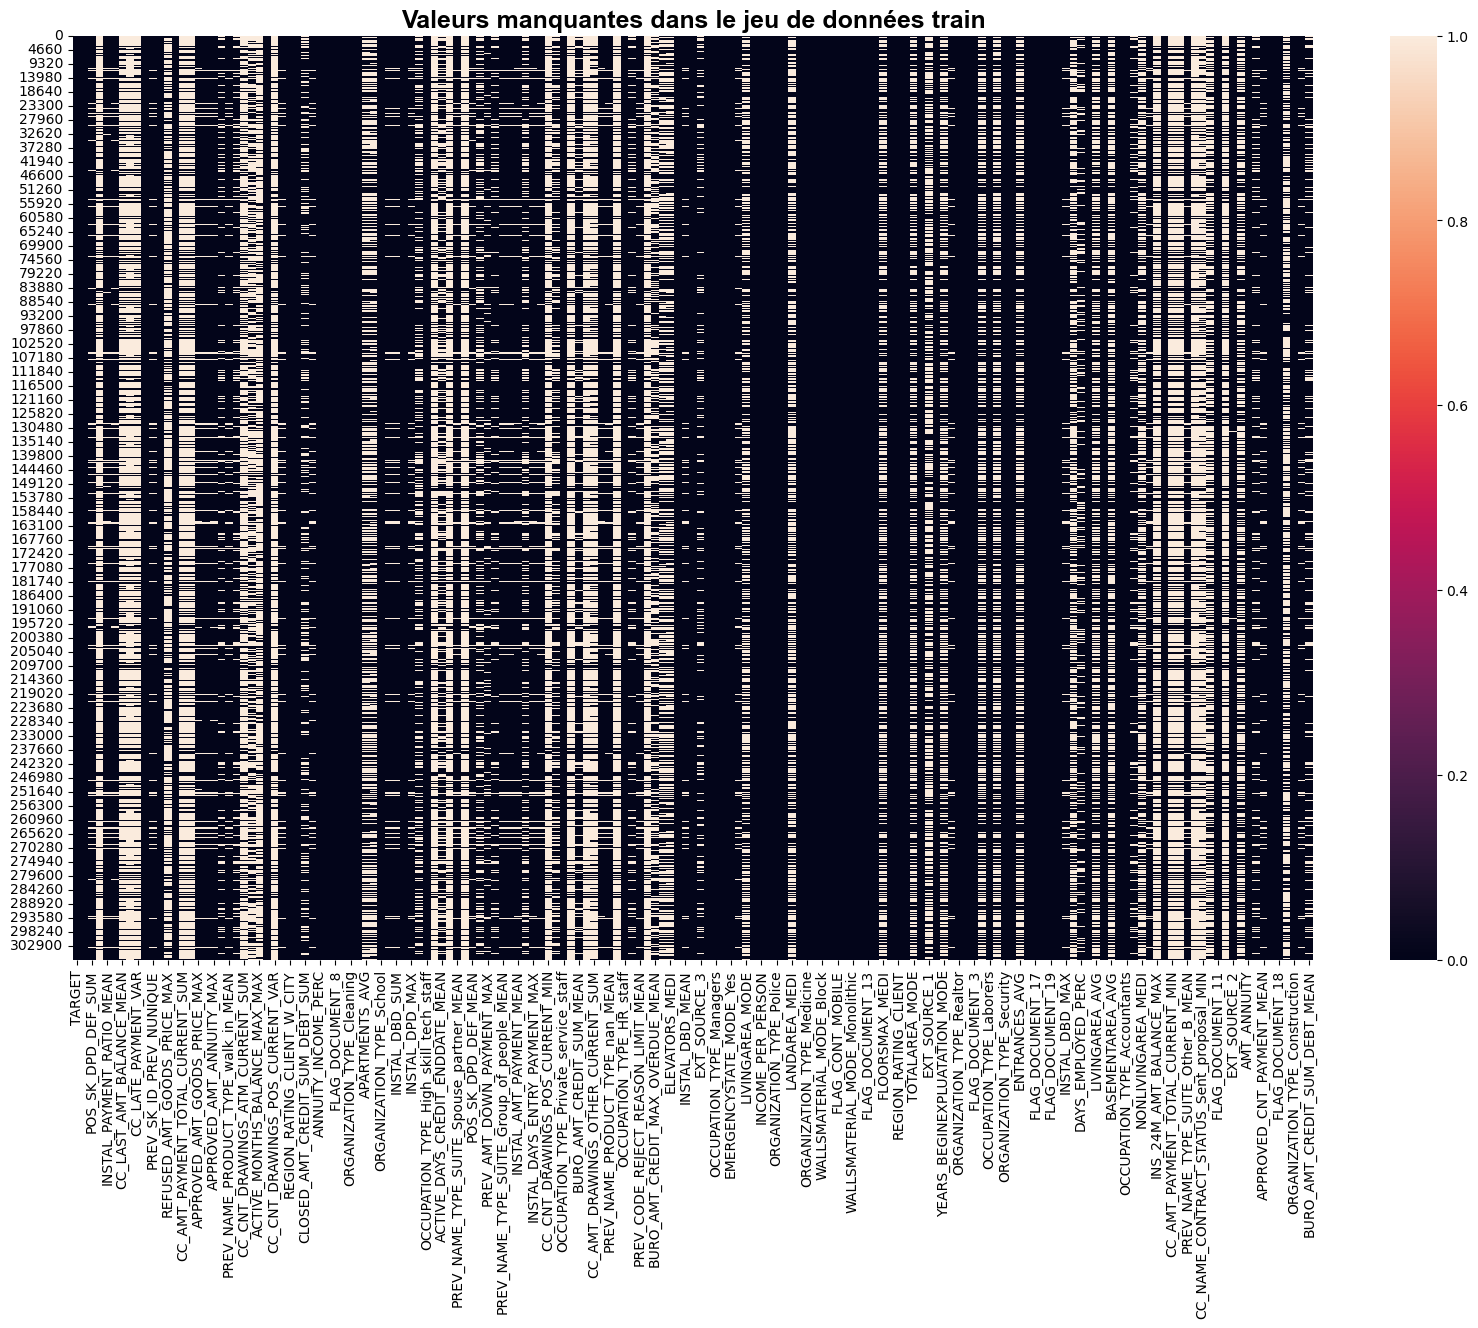

In [86]:
# Création d'un heatmap pour visualiser les valeurs manquantes du train
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull())

# Affichage du titre
plt.title("Valeurs manquantes dans le jeu de données train", fontdict = title)

# Affichage du graphique
plt.show()

Ce graphique nous présente bien une forte présence de valeurs manquantes. Nous allons prendre la décision de partir sur une imputaton à travers la méthode du SimpleImputer avec une stratégie basée sur la moyenne.

In [87]:
# Imputation des variables

df.replace([np.inf, -np.inf], np.nan, inplace=True)
col_num = list(df.select_dtypes('float64').columns)

imp_mean = SimpleImputer(strategy='mean') # Création de l'objet SimpleImputer et définition de la stratégie de l'imputation
df[col_num] = imp_mean.fit_transform(df[col_num]) # Imputation des données manquantes dans les colonnes numériques

# Renommer les variables

df.rename(columns={
    'CODE_GENDER': 'Sexe',
    'AMT_ANNUITY': 'Revenus annuels',
    'AMT_INCOME_TOTAL': 'Revenus totaux',
    'AMT_CREDIT': 'Somme des crédits',
    'INCOME_CREDIT_PERC': 'Taux d’endettement',
    'FLAG_OWN_REALTY': 'Propriétaire'}, inplace = True)

A présent, notre étape du Feature engineering est terminé.

Nous avons bien répondu et traité les points suivants :
- Sélection et création des nouvelles variables,
- Regroupement de l'ensemble des fichiers,
- Imputation des valeurs manquantes.


# 

Dans cette première phase, nous avons parfaitement finalisé nos différentes étapes, à savoir :
- L'analyse exploratoire qui nous a permis d'avoir une meilleure connaissance de notre jeu de données. Cette première phase nous a permis de mieux appréhender notre jeu de données et d'en obtenir les principales informations,
- Le Feature Engineering à travers la création de variables, la sélection des données les plus pertinentes mais également l'imputation des données à travers le SimpleImputer. Cette étape étant réalisée à travers de nombreuses recherches sur le site Kaggle, cela nous a permis de synthétiser la création et le regroupement des variables.

### 4. Sauvegarde du fichier

In [88]:
# Enregistrer le DataFrame en tant que fichier CSV
df.to_csv('df_cleaning.csv')

In [92]:
df = pd.read_csv('df_cleaning.csv')
df

,Unnamed: 0,TARGET,SK_ID_CURR,POS_SK_DPD_DEF_SUM,CC_DRAWING_LIMIT_RATIO_MAX,INSTAL_PAYMENT_RATIO_MEAN,POS_REMAINING_INSTALMENTS,CC_LAST_AMT_BALANCE_MEAN,CC_PAYMENT_DIV_MIN_MIN,CC_LATE_PAYMENT_VAR,NEW_DOC_KURT,PREV_SK_ID_PREV_NUNIQUE,EMERGENCYSTATE_MODE_nan,REFUSED_AMT_GOODS_PRICE_MAX,ORGANIZATION_TYPE_Industry_type_5,CC_AMT_PAYMENT_TOTAL_CURRENT_SUM,CC_CNT_DRAWINGS_POS_CURRENT_SUM,APPROVED_AMT_GOODS_PRICE_MAX,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,APPROVED_AMT_ANNUITY_MAX,BURO_CREDIT_ACTIVE_Active_MEAN,PREV_NAME_PRODUCT_TYPE_walk_in_MEAN,BURO_AMT_CREDIT_SUM_MAX,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_MONTHS_BALANCE_MAX_MAX,NAME_EDUCATION_TYPE_Higher_education,CC_CNT_DRAWINGS_POS_CURRENT_VAR,PREV_APP_CREDIT_PERC_MIN,REGION_RATING_CLIENT_W_CITY,NAME_HOUSING_TYPE_House_apartment,CLOSED_AMT_CREDIT_SUM_DEBT_SUM,APPROVED_DAYS_DECISION_MEAN,ANNUITY_INCOME_PERC,ORGANIZATION_TYPE_Services,FLAG_DOCUMENT_8,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Military,APARTMENTS_AVG,ELEVATORS_AVG,ORGANIZATION_TYPE_School,INSTAL_DPD_MEAN,INSTAL_DBD_SUM,DAYS_BIRTH,INSTAL_DPD_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,OCCUPATION_TYPE_High_skill_tech_staff,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MIN,PREV_NAME_TYPE_SUITE_Spouse_partner_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN,POS_SK_DPD_DEF_MEAN,ACTIVE_DAYS_CREDIT_ENDDATE_MIN,PREV_AMT_DOWN_PAYMENT_MAX,BURO_AMT_CREDIT_SUM_SUM,PREV_NAME_TYPE_SUITE_Group_of_people_MEAN,PREV_APP_CREDIT_PERC_MEAN,INSTAL_AMT_PAYMENT_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_MAX,PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_MIN,ACTIVE_AMT_CREDIT_SUM_MEAN,OCCUPATION_TYPE_Private_service_staff,CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN,BURO_AMT_CREDIT_SUM_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_MIN,CC_AMT_DRAWINGS_OTHER_CURRENT_SUM,INSTAL_AMT_PAYMENT_SUM,PREV_NAME_PRODUCT_TYPE_nan_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,OCCUPATION_TYPE_HR_staff,BURO_AMT_CREDIT_SUM_OVERDUE_MEAN,PREV_CODE_REJECT_REASON_LIMIT_MEAN,CC_AMT_DRAWINGS_POS_CURRENT_MIN,BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,FLOORSMAX_MODE,ELEVATORS_MEDI,CODE_GENDER,INSTAL_DBD_MEAN,ORGANIZATION_TYPE_Advertising,EXT_SOURCE_3,FLAG_DOCUMENT_20,OCCUPATION_TYPE_Managers,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE_Yes,POS_COUNT,LIVINGAREA_MODE,AMT_CREDIT,INCOME_PER_PERSON,EMERGENCYSTATE_MODE_No,ORGANIZATION_TYPE_Police,FLAG_WORK_PHONE,LANDAREA_MEDI,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Telecom,WALLSMATERIAL_MODE_Block,ORGANIZATION_TYPE_Housing,FLAG_CONT_MOBILE,FLAG_EMAIL,WALLSMATERIAL_MODE_Monolithic,REGION_POPULATION_RELATIVE,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLOORSMAX_MEDI,ORGANIZATION_TYPE_Electricity,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,TOTALAREA_MODE,WALLSMATERIAL_MODE_Mixed,EXT_SOURCE_1,FLAG_DOCUMENT_16,YEARS_BEGINEXPLUATATION_MODE,INSTAL_COUNT,ORGANIZATION_TYPE_Realtor,FLAG_DOCUMENT_6,FLAG_DOCUMENT_3,FLOORSMAX_AVG,OCCUPATION_TYPE_Laborers,APARTMENTS_MODE,ORGANIZATION_TYPE_Security,AMT_INCOME_TOTAL,ENTRANCES_AVG,PAYMENT_RATE,FLAG_DOCUMENT_17,FLAG_OWN_CAR,FLAG_DOCUMENT_19,ORGANIZATION_TYPE_Mobile,INSTAL_DBD_MAX,LANDAREA_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,LIVINGAREA_AVG,ORGANIZATION_TYPE_Postal,BASEMENTAREA_AVG,ORGANIZATION_TYPE_Insurance,OCCUPATION_TYPE_Accountants,BURO_CREDIT_TYPE_Microloan_MEAN,NONLIVINGAREA_MEDI,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INS_24M_AMT_BALANCE_MAX,ORGANIZATION_TYPE_Agriculture,CC_AMT_PAYMENT_TOTAL_CURRENT_MIN,CC_CNT_DRAWINGS_OTHER_CURRENT_SUM,PREV_NAME_TYPE_SUITE_Other_B_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_MIN,CC_NAME_CONTRACT_STATUS_Sent_proposal_MIN,NONLIVINGAREA_AVG,FLAG_DOCUMENT_11,CC_CNT_DRAWINGS_CURRENT_MIN,EXT_SOURCE_2,NONLIVINGAREA_MODE,AMT_ANNUITY,BURO_CREDIT_TYPE_Mortgage_MEAN,APPROVED_CNT_PAYMENT_MEAN,FLAG_DOCUMENT_7,FLAG_DOCUMENT_18,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ORGANIZATION_TYPE_Construction,INSTAL_AMT_PAYMENT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MEAN
0,0,1,100002,0.0,0.522181,1.00000,6.

In [94]:
df = pd.read_csv('df_cleaning.csv', index_col=0)
df

,TARGET,SK_ID_CURR,POS_SK_DPD_DEF_SUM,CC_DRAWING_LIMIT_RATIO_MAX,INSTAL_PAYMENT_RATIO_MEAN,POS_REMAINING_INSTALMENTS,CC_LAST_AMT_BALANCE_MEAN,CC_PAYMENT_DIV_MIN_MIN,CC_LATE_PAYMENT_VAR,NEW_DOC_KURT,PREV_SK_ID_PREV_NUNIQUE,EMERGENCYSTATE_MODE_nan,REFUSED_AMT_GOODS_PRICE_MAX,ORGANIZATION_TYPE_Industry_type_5,CC_AMT_PAYMENT_TOTAL_CURRENT_SUM,CC_CNT_DRAWINGS_POS_CURRENT_SUM,APPROVED_AMT_GOODS_PRICE_MAX,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,APPROVED_AMT_ANNUITY_MAX,BURO_CREDIT_ACTIVE_Active_MEAN,PREV_NAME_PRODUCT_TYPE_walk_in_MEAN,BURO_AMT_CREDIT_SUM_MAX,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_MONTHS_BALANCE_MAX_MAX,NAME_EDUCATION_TYPE_Higher_education,CC_CNT_DRAWINGS_POS_CURRENT_VAR,PREV_APP_CREDIT_PERC_MIN,REGION_RATING_CLIENT_W_CITY,NAME_HOUSING_TYPE_House_apartment,CLOSED_AMT_CREDIT_SUM_DEBT_SUM,APPROVED_DAYS_DECISION_MEAN,ANNUITY_INCOME_PERC,ORGANIZATION_TYPE_Services,FLAG_DOCUMENT_8,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Military,APARTMENTS_AVG,ELEVATORS_AVG,ORGANIZATION_TYPE_School,INSTAL_DPD_MEAN,INSTAL_DBD_SUM,DAYS_BIRTH,INSTAL_DPD_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,OCCUPATION_TYPE_High_skill_tech_staff,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MIN,PREV_NAME_TYPE_SUITE_Spouse_partner_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN,POS_SK_DPD_DEF_MEAN,ACTIVE_DAYS_CREDIT_ENDDATE_MIN,PREV_AMT_DOWN_PAYMENT_MAX,BURO_AMT_CREDIT_SUM_SUM,PREV_NAME_TYPE_SUITE_Group_of_people_MEAN,PREV_APP_CREDIT_PERC_MEAN,INSTAL_AMT_PAYMENT_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_MAX,PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_MIN,ACTIVE_AMT_CREDIT_SUM_MEAN,OCCUPATION_TYPE_Private_service_staff,CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN,BURO_AMT_CREDIT_SUM_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_MIN,CC_AMT_DRAWINGS_OTHER_CURRENT_SUM,INSTAL_AMT_PAYMENT_SUM,PREV_NAME_PRODUCT_TYPE_nan_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,OCCUPATION_TYPE_HR_staff,BURO_AMT_CREDIT_SUM_OVERDUE_MEAN,PREV_CODE_REJECT_REASON_LIMIT_MEAN,CC_AMT_DRAWINGS_POS_CURRENT_MIN,BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,FLOORSMAX_MODE,ELEVATORS_MEDI,CODE_GENDER,INSTAL_DBD_MEAN,ORGANIZATION_TYPE_Advertising,EXT_SOURCE_3,FLAG_DOCUMENT_20,OCCUPATION_TYPE_Managers,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE_Yes,POS_COUNT,LIVINGAREA_MODE,AMT_CREDIT,INCOME_PER_PERSON,EMERGENCYSTATE_MODE_No,ORGANIZATION_TYPE_Police,FLAG_WORK_PHONE,LANDAREA_MEDI,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Telecom,WALLSMATERIAL_MODE_Block,ORGANIZATION_TYPE_Housing,FLAG_CONT_MOBILE,FLAG_EMAIL,WALLSMATERIAL_MODE_Monolithic,REGION_POPULATION_RELATIVE,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLOORSMAX_MEDI,ORGANIZATION_TYPE_Electricity,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,TOTALAREA_MODE,WALLSMATERIAL_MODE_Mixed,EXT_SOURCE_1,FLAG_DOCUMENT_16,YEARS_BEGINEXPLUATATION_MODE,INSTAL_COUNT,ORGANIZATION_TYPE_Realtor,FLAG_DOCUMENT_6,FLAG_DOCUMENT_3,FLOORSMAX_AVG,OCCUPATION_TYPE_Laborers,APARTMENTS_MODE,ORGANIZATION_TYPE_Security,AMT_INCOME_TOTAL,ENTRANCES_AVG,PAYMENT_RATE,FLAG_DOCUMENT_17,FLAG_OWN_CAR,FLAG_DOCUMENT_19,ORGANIZATION_TYPE_Mobile,INSTAL_DBD_MAX,LANDAREA_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,LIVINGAREA_AVG,ORGANIZATION_TYPE_Postal,BASEMENTAREA_AVG,ORGANIZATION_TYPE_Insurance,OCCUPATION_TYPE_Accountants,BURO_CREDIT_TYPE_Microloan_MEAN,NONLIVINGAREA_MEDI,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INS_24M_AMT_BALANCE_MAX,ORGANIZATION_TYPE_Agriculture,CC_AMT_PAYMENT_TOTAL_CURRENT_MIN,CC_CNT_DRAWINGS_OTHER_CURRENT_SUM,PREV_NAME_TYPE_SUITE_Other_B_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_MIN,CC_NAME_CONTRACT_STATUS_Sent_proposal_MIN,NONLIVINGAREA_AVG,FLAG_DOCUMENT_11,CC_CNT_DRAWINGS_CURRENT_MIN,EXT_SOURCE_2,NONLIVINGAREA_MODE,AMT_ANNUITY,BURO_CREDIT_TYPE_Mortgage_MEAN,APPROVED_CNT_PAYMENT_MEAN,FLAG_DOCUMENT_7,FLAG_DOCUMENT_18,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ORGANIZATION_TYPE_Construction,INSTAL_AMT_PAYMENT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MEAN
0,1,100002,0.0,0.522181,1.00000,6.0,76645.79140

In [95]:
# Enregistrer le DataFrame en tant que fichier CSV
df.to_csv('df__cleaning.csv')

# 

## IV. Conclusion sur étape EDA - Feature Engineering

En conclusion, notre projet d'exploration des fichiers a été crucial pour analyser un ensemble de variables essentielles telles que les revenus annuels, le montant des crédits, le genre, etc. Cependant, lors de notre analyse de la variable cible, nous avons constaté un fort déséquilibre, ce qui nécessite une attention particulière lors de la modélisation.

Dans notre processus, nous avons également mis en œuvre l'étape du Feature Engineering, en suivant les recommandations de Kaggle pour ce projet. Cela nous a permis d'acquérir des connaissances approfondies sur différentes méthodes utilisées dans cette étape cruciale de préparation des données.

Par la suite, nous avons regroupé tous les fichiers analysés en amont et procédé à une sélection des variables les plus pertinentes pour notre modèle. Nous avons également effectué une imputation des valeurs manquantes, garantissant ainsi l'intégrité des données pour la modélisation ultérieure.

En résumé, notre exploration complète des fichiers, la gestion du déséquilibre de la variable cible, l'utilisation du Feature Engineering recommandé par Kaggle, la sélection des variables pertinentes et l'imputation des valeurs manquantes ont jeté les bases solides pour notre phase de modélisation. Ces étapes préliminaires sont cruciales pour garantir la qualité et la fiabilité de nos résultats futurs.